#### <b>CAR PRICE PREDICTION </b>

<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

| Feature           | Description                                             |
|-------------------|---------------------------------------------------------|
| Car_ID            | Unique id of each observation                           |
| Symboling         | Assigned insurance risk rating                          |
| carCompany        | Name of car company                                     |
| fueltype          | Car fuel type (gas or diesel)                           |
| aspiration        | Aspiration used in a car                                |
| doornumber        | Number of doors in a car                                |
| carbody           | Body of car                                             |
| drivewheel        | Type of drive wheel                                     |
| enginelocation    | Location of car engine                                  |
| wheelbase         | Wheelbase of car                                        |
| carlength         | Length of car                                           |
| carwidth          | Width of car                                            |
| carheight         | Height of car                                           |
| curbweight        | Weight of a car without occupants or baggage           |
| enginetype        | Type of engine                                          |
| cylindernumber    | Number of cylinders placed in the car                   |
| enginesize        | Size of car engine                                      |
| fuelsystem        | Fuel system of car                                      |
| boreratio         | Bore ratio of car                                       |
| stroke            | Stroke or volume inside the engine                      |
| compressionratio  | Compression ratio of car                                |
| horsepower        | Horsepower                                              |
| peakrpm           | Car peak rpm                                            |
| citympg           | Mileage in city                                         |
| highwaympg        | Mileage on highway                                      |
| price             | Price of car                                            |


<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>Importing Libraries</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import  DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#defualt settings
pd.set_option('display.max.columns',50)
sns.set(style='darkgrid', font_scale=1.5)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Data Loading</b></font>

In [3]:
import os

for dirname, _, filenames in os.walk('dataset/'):
    for file in filenames:
        path = os.path.join(dirname, file)
        print(path)

train_data = pd.read_csv(f'{path}')

dataset/car-details.csv


In [4]:
#displaying the first 5 rows
train_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<a id="3"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

1. Checking the dimensions of the Datasets

In [5]:
print('Train Dataset has ', train_data.shape[0], 'Records/Row and ', train_data.shape[1], 'features/columns', '\n')

Train Dataset has  205 Records/Row and  26 features/columns 



2. General Information

In [6]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 26 entries, car_ID to price
dtypes: float64(8), int64(8), object(10)
memory usage: 41.8+ KB


Inferences:
1. There is a total of 205 record entries and 26 column entries
2. The common data-types includes float64, int64 and object
3. Out of the 26 columns: 
   <ul>
      <li> 16 columns are numerical and </li>
      <li> 10 columns are categorical </li>
   </ul>

3. Overall Statistics on Catergorical Data

In [7]:
train_data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Inferences:
1. Most of the categorical fetaures are not having high cardinality
2. Features like CarName is having a high cardinality. It will be either reduced or dropped.

4. Checking for Duplicate Values

In [8]:
train_data.duplicated().sum()

0

5. Checking for Missing Values

In [9]:
null_df = round(
    train_data.isnull().sum()/ len(train_data) * 100
,2).sort_values().to_frame().rename(columns={
    0:'Train Data % of Missing Values'
})

In [10]:
null_df

,Train Data % of Missing Values
car_ID,0.0
citympg,0.0
peakrpm,0.0
horsepower,0.0
compressionratio,0.0
stroke,0.0
boreratio,0.0
fuelsystem,0.0
enginesize,0.0
cylindernumber,0.0


Inference:
1. There are no missing values in the data.

6. General Overview

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

7. Overall Statistics

In [12]:
train_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inference:
1. The car_ID is a repetition on index as such it will be dropped.

In [13]:
train_data.drop(columns=['car_ID'], inplace=True)

In [14]:
train_data.sample()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
112,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,16900.0


<a id="4"></a>
<font color="lightseagreen" size=+2.5><b>Data Preprocessing/ Visualizations</b></font>

1. The Target Feature

In [15]:
train_data['price'].describe().to_frame()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


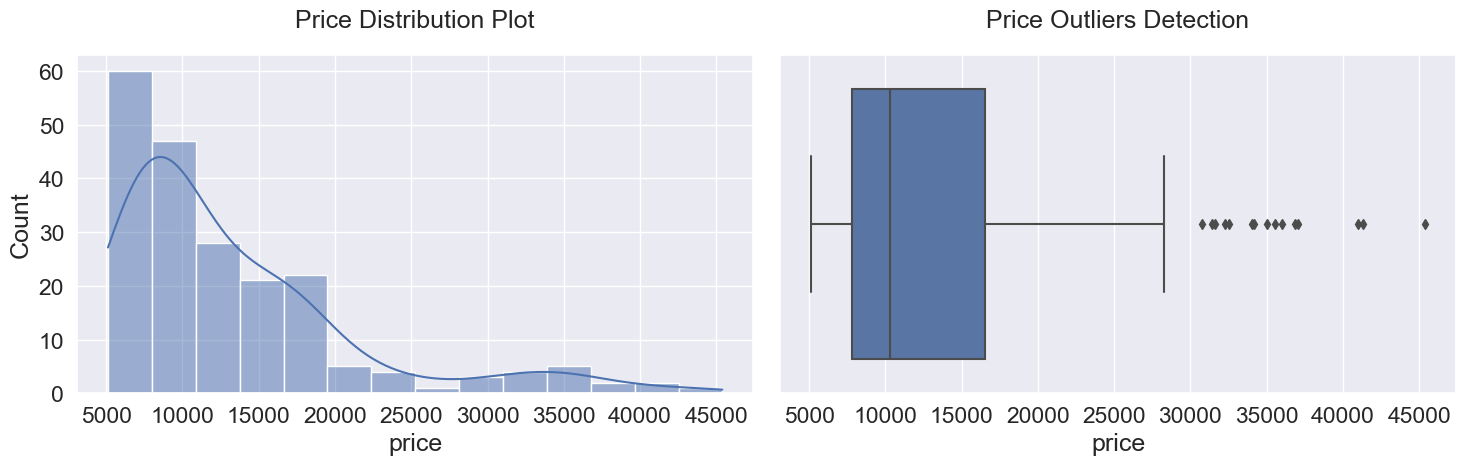

In [16]:
#visualzing the data

#increasing the figure size
plt.figure(figsize=(15,5))

#subplot 1
plt.subplot(1,2,1)
sns.histplot(
    train_data['price'], kde=True
)
plt.title("Price Distribution Plot",pad=20)

#subplot 2
plt.subplot(1,2,2)
sns.boxplot(
    x=train_data['price']
)
plt.title("Price Outliers Detection",pad=20)

plt.tight_layout()
plt.show()

Inferences:
1. The Price is right skewed indicating the presence of positive outliers
2. The Target Feature doesn't follow a normal distribution due to it skewness it will be transformed to acheive a Normal Distribution before performing regression

2. Car Name

In [17]:
train_data['CarName'].str.split().str[0].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

Inferences:
1. The CarName Feature doesn't seem like an important feature for predicting car price and as such it will be dropped. Also there are too much typos and it will be difficult to encode.

In [18]:
train_data.drop(columns=['CarName'], inplace=True)

<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>Numerical Features</b></font>

In [19]:
#converting to the right data-type
train_data['cylindernumber']= train_data['cylindernumber'].map({
    'four':4,
    'six':6,
    'five':5,
    'eight':8,
    'two':2,
    'three':3,
    'twelve':12

})
train_data['cylindernumber'].values

array([ 4,  4,  6,  4,  5,  5,  5,  5,  5,  5,  4,  4,  6,  6,  6,  6,  6,
        6,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  6, 12,  4,
        4,  4,  4,  4,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  8,  8,  8,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,
        6,  6,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  6,  6,  6,  8,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  6,  6,  6,  6,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  6,
        4], dtype=int64)

In [20]:
train_data['doornumber']= train_data['doornumber'].map({
    'four':4,
    'two':2
})
train_data['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [21]:
#selecting Numerical features
num_col= train_data.select_dtypes(exclude='object')

In [22]:
pd.DataFrame({
    'Features': [col for col in num_col.columns],
    'Number of Unique Values': [train_data[col].nunique() for col in num_col.columns],
    'Discrete Values': [1 if train_data[col].nunique()< 20 else 0  for col in num_col.columns],
    'Continuous Features': [1 if num_col[col].nunique() > 20 else 0 for col in num_col ]
})

,Features,Number of Unique Values,Discrete Values,Continuous Features
0,symboling,6,1,0
1,doornumber,2,1,0
2,wheelbase,53,0,1
3,carlength,75,0,1
4,carwidth,44,0,1
5,carheight,49,0,1
6,curbweight,171,0,1
7,cylindernumber,7,1,0
8,enginesize,44,0,1
9,boreratio,38,0,1


In [23]:
num_col_list = num_col.columns.to_list()
num_col_list.remove('price')
num_col_list.remove('symboling')
num_col_list.remove('doornumber')
num_col_list.remove('cylindernumber')

A. Visualizing Continuous Features

In [24]:
#selecting continuous features
cons_cols =num_col_list

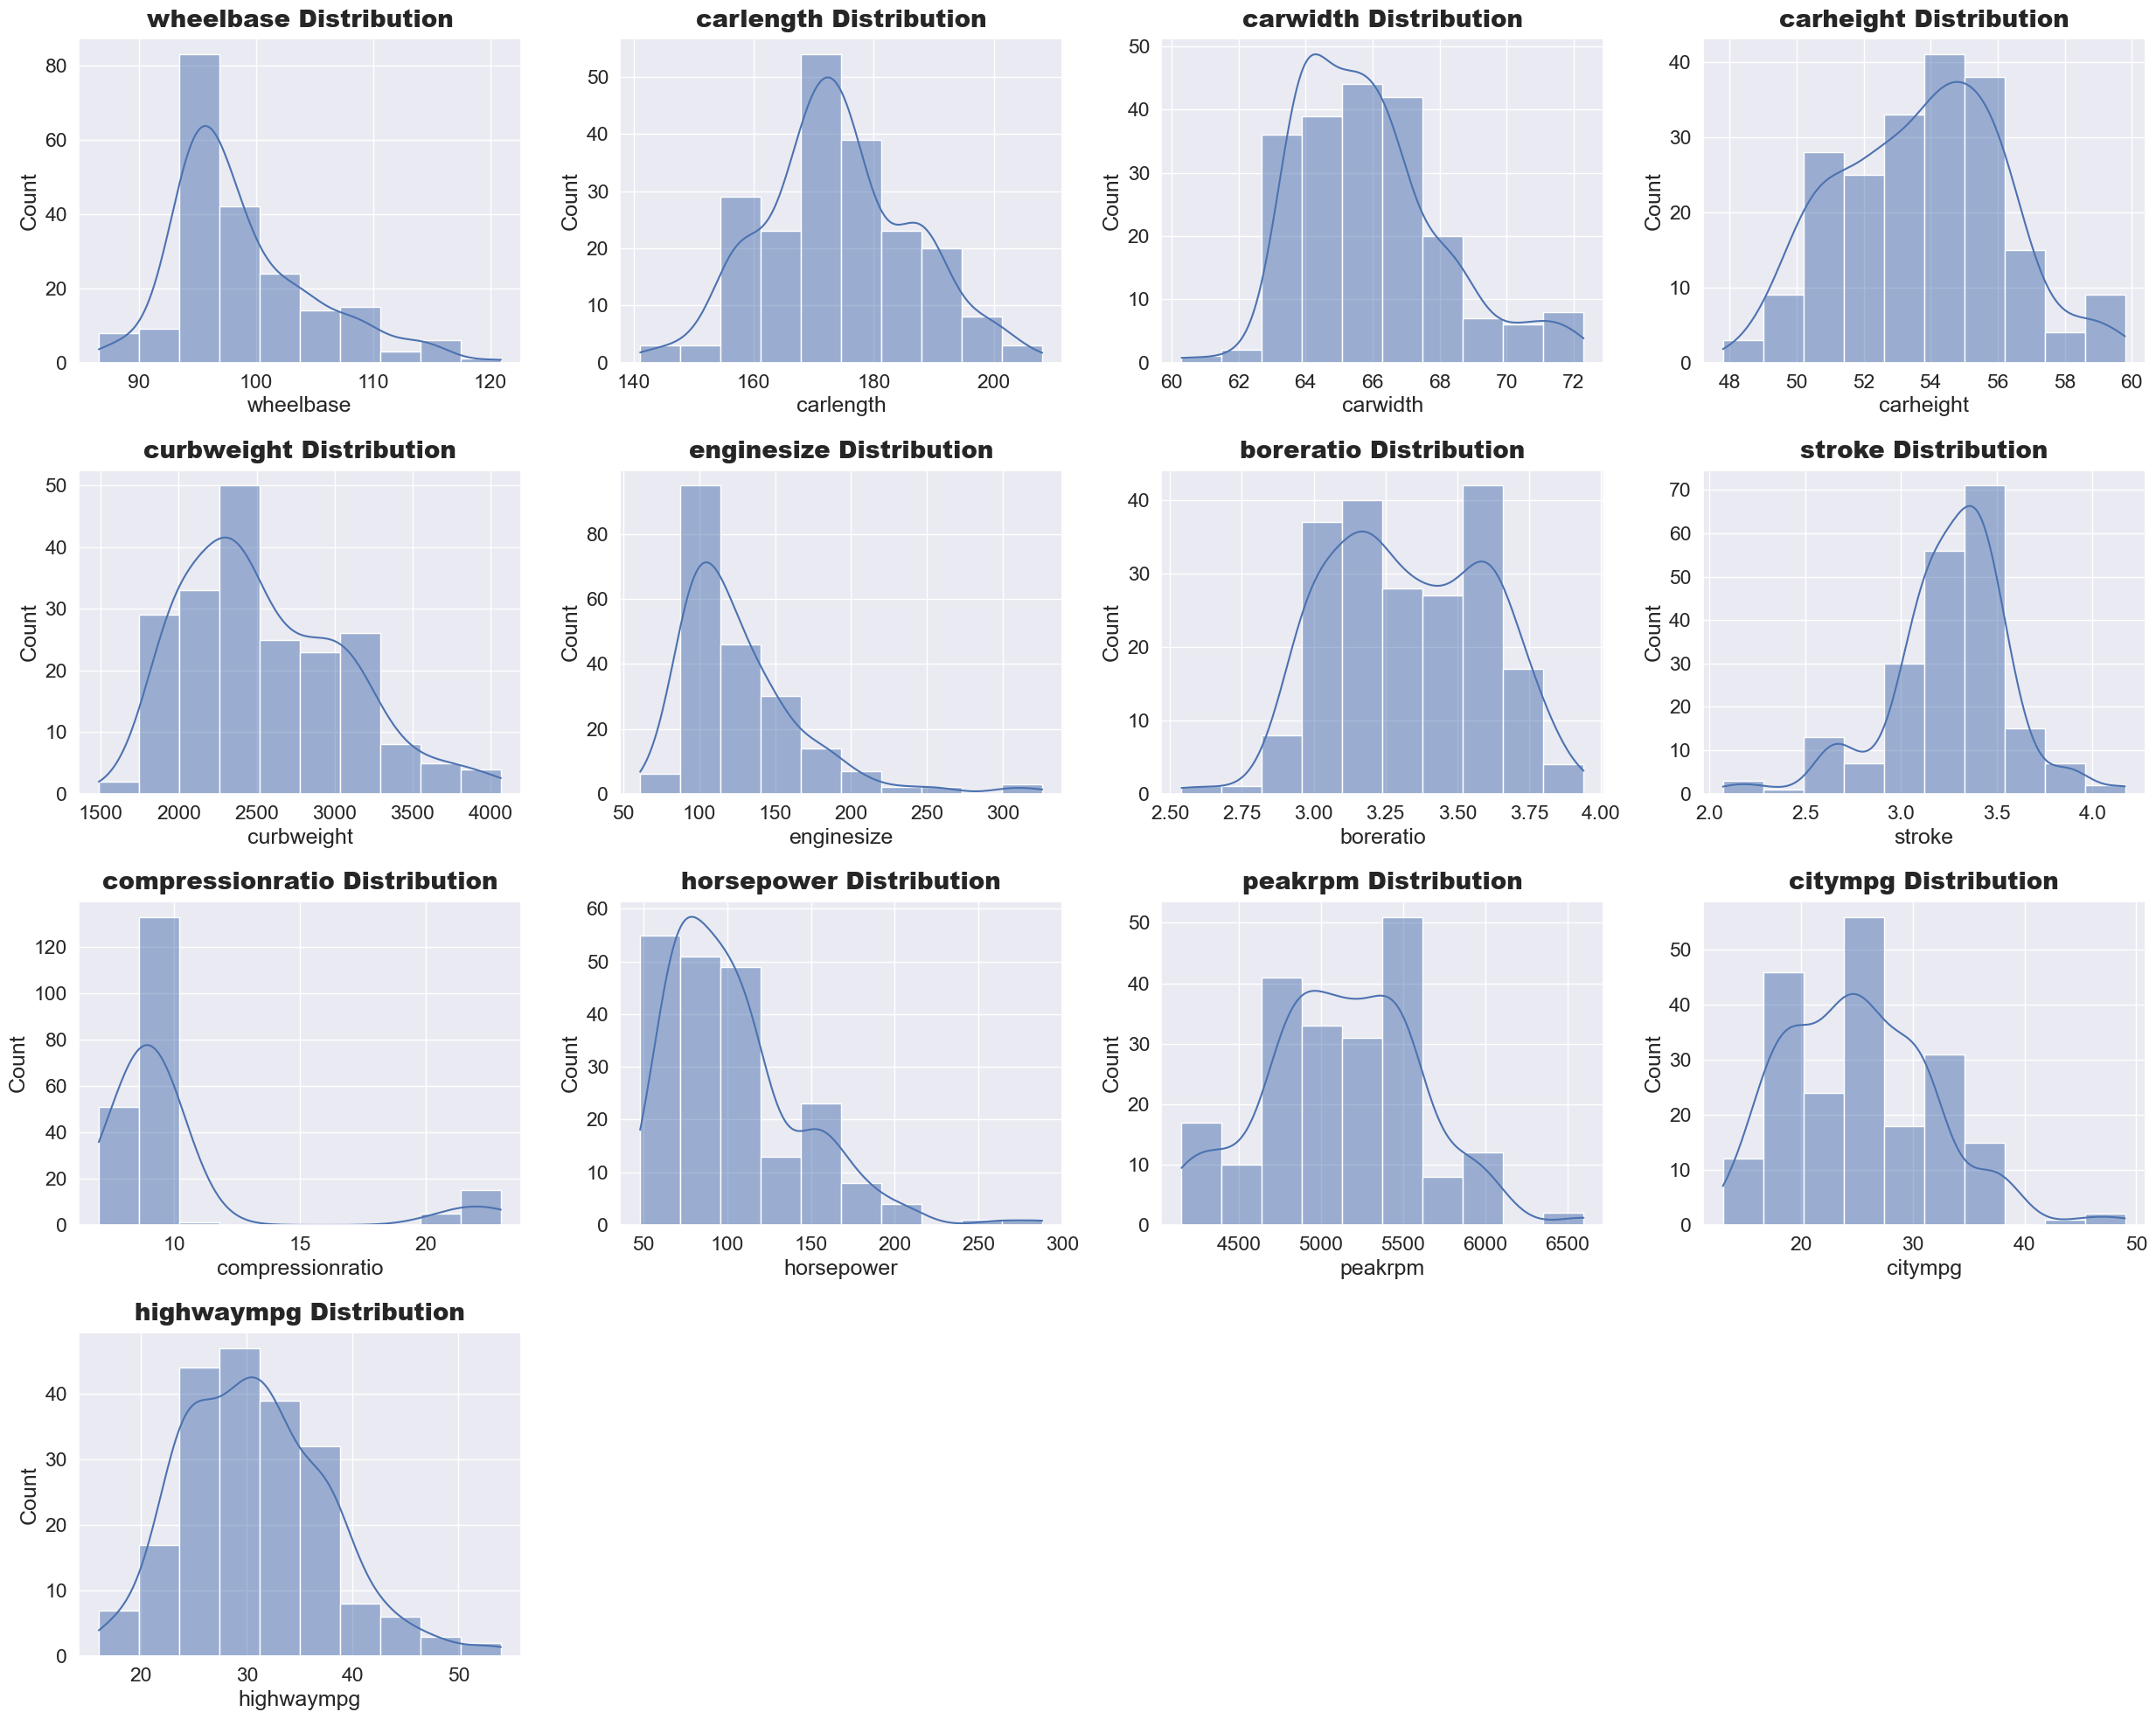

In [25]:
#increasing the figure size
plt.figure(figsize=(25,20))


for idx, val in enumerate(cons_cols):
    plt.subplot(4,4,idx+1)

    sns.histplot(
        train_data[val], bins=10, kde=True
    )
    plt.title(f"{val} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

Inferences:
1. Boreratio Feature is having somewhat of a Normal Distribution.
2. Stroke Feature is left skewed.
3. The rest of theses Features are right Skewed.

B. Checking Skewness Values

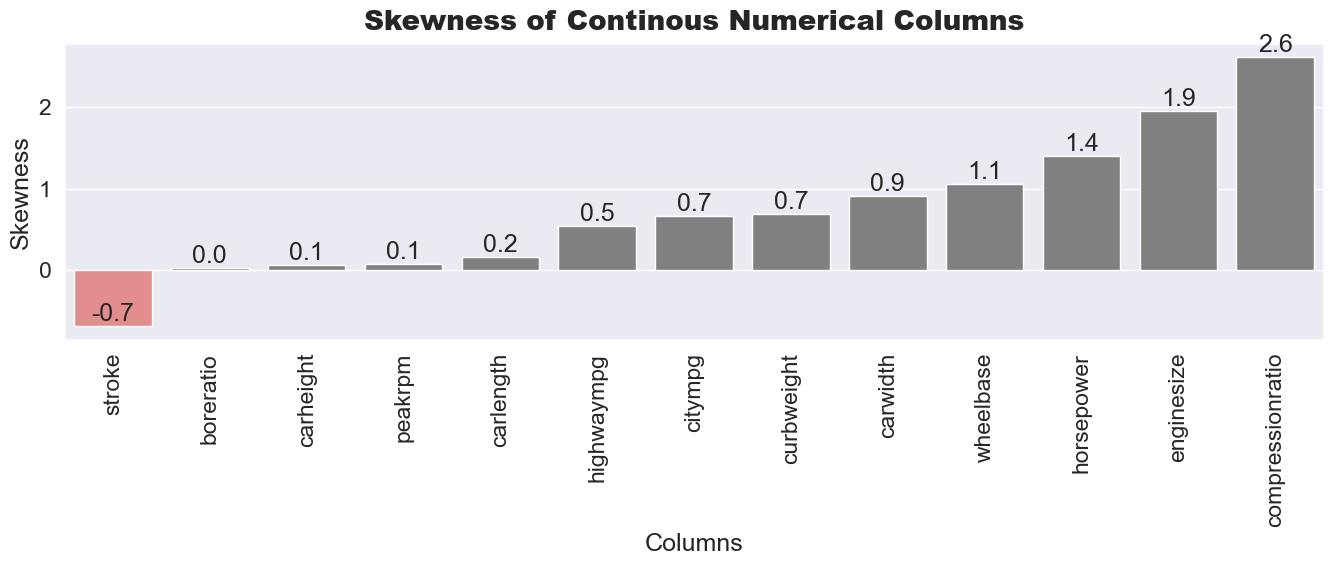

In [26]:
skewness = train_data[cons_cols].skew().sort_values()
plt.figure(figsize=(14,6))


sns.barplot(
    x=skewness.index,
    y=skewness.values,
    palette=[ '#808080' if v >=0 else 'lightcoral' for v in skewness]
)
for idx, val in enumerate(skewness):
    plt.text(idx, val, f'{val:.1f}', ha='center', va='bottom')
plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)

plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

Inferences:
1. Features like Cylinder, Compressionratio, Enginesize, Horsepower, Carwidth, Carweight and Citympg have high values for skewness.
2. Highwaympg has a moderate value for Skewness.
3. Stroke and Doornumber Features have a negative value for Skewness.
4. The remaining Features have low values for Skewness.

C. Correlation w.r.t Price

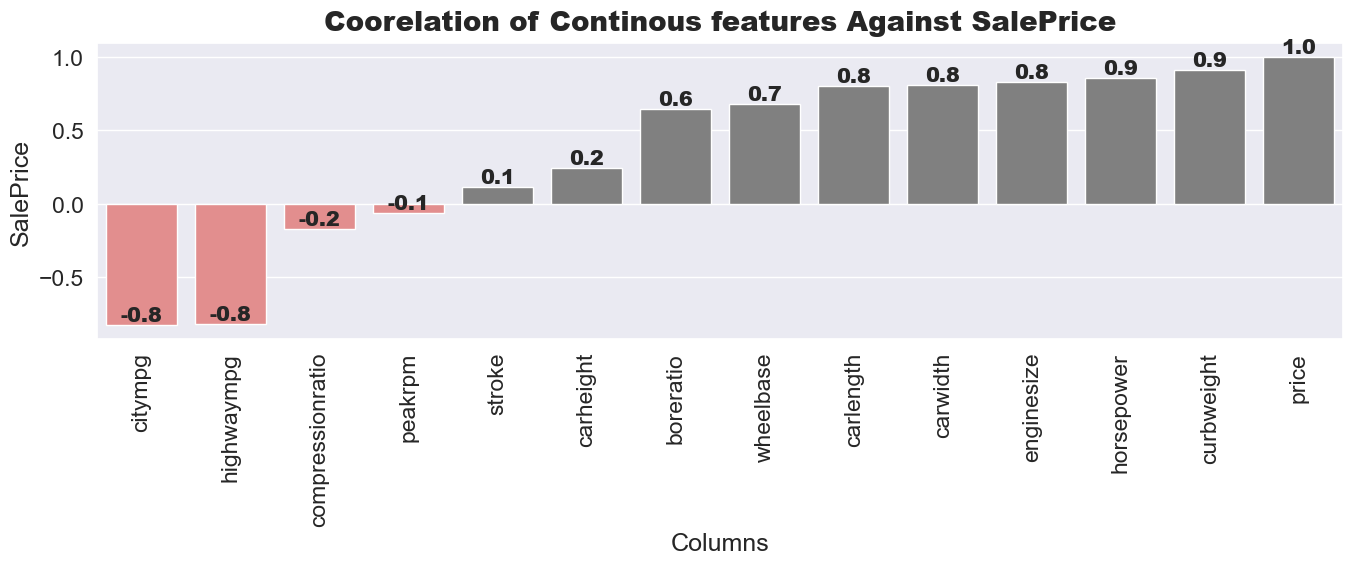

In [27]:
#adding salePrice
cons_cols.append("price")
corr = train_data[cons_cols].corr(method='spearman')['price'].sort_values()
plt.figure(figsize=(14,6))

sns.barplot(
    x=corr.index, y=corr.values, palette=['#808080' if v >0 else 'lightcoral' for v in corr]
)

for idx, val in enumerate(corr):
    plt.text(idx, val, f'{val:.1f}', va='bottom', ha='center', size=15, fontweight='black')

plt.title("Coorelation of Continous features Against SalePrice",fontweight="black",size=20,pad=10)
plt.ylabel("SalePrice")
plt.xlabel("Columns")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Inferences:
1. Features like citympg and highwaympg, carlength and carwidth have the same realtion value with price. So we will need to combine them to avoid multicolinearity.
2. Features like Peakrpm and Stroke have low correlation with the Target Price.


<a id="7"></a>
<font color="lightseagreen" size=+2.5><b>Categorical Features</b></font>

A. Categorical Features wrt Average Car Price.

In [28]:
cat_cols = train_data.select_dtypes(exclude=np.number).columns
cat_cols

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem'],
      dtype='object')

In [29]:
def bar_plot(col_list):
    plt.figure(figsize=(19,15))

    for idx, val in enumerate(col_list):
        plt.subplot(3,3, idx+1)
        data = train_data.groupby(val)['price'].mean()

        sns.barplot(
            x=data.index, y=data.values
        )

        plt.title(f'{val.upper()} vs Average Price', pad=16)

        plt.tight_layout(w_pad=0.5, h_pad=0.5)

    plt.show()

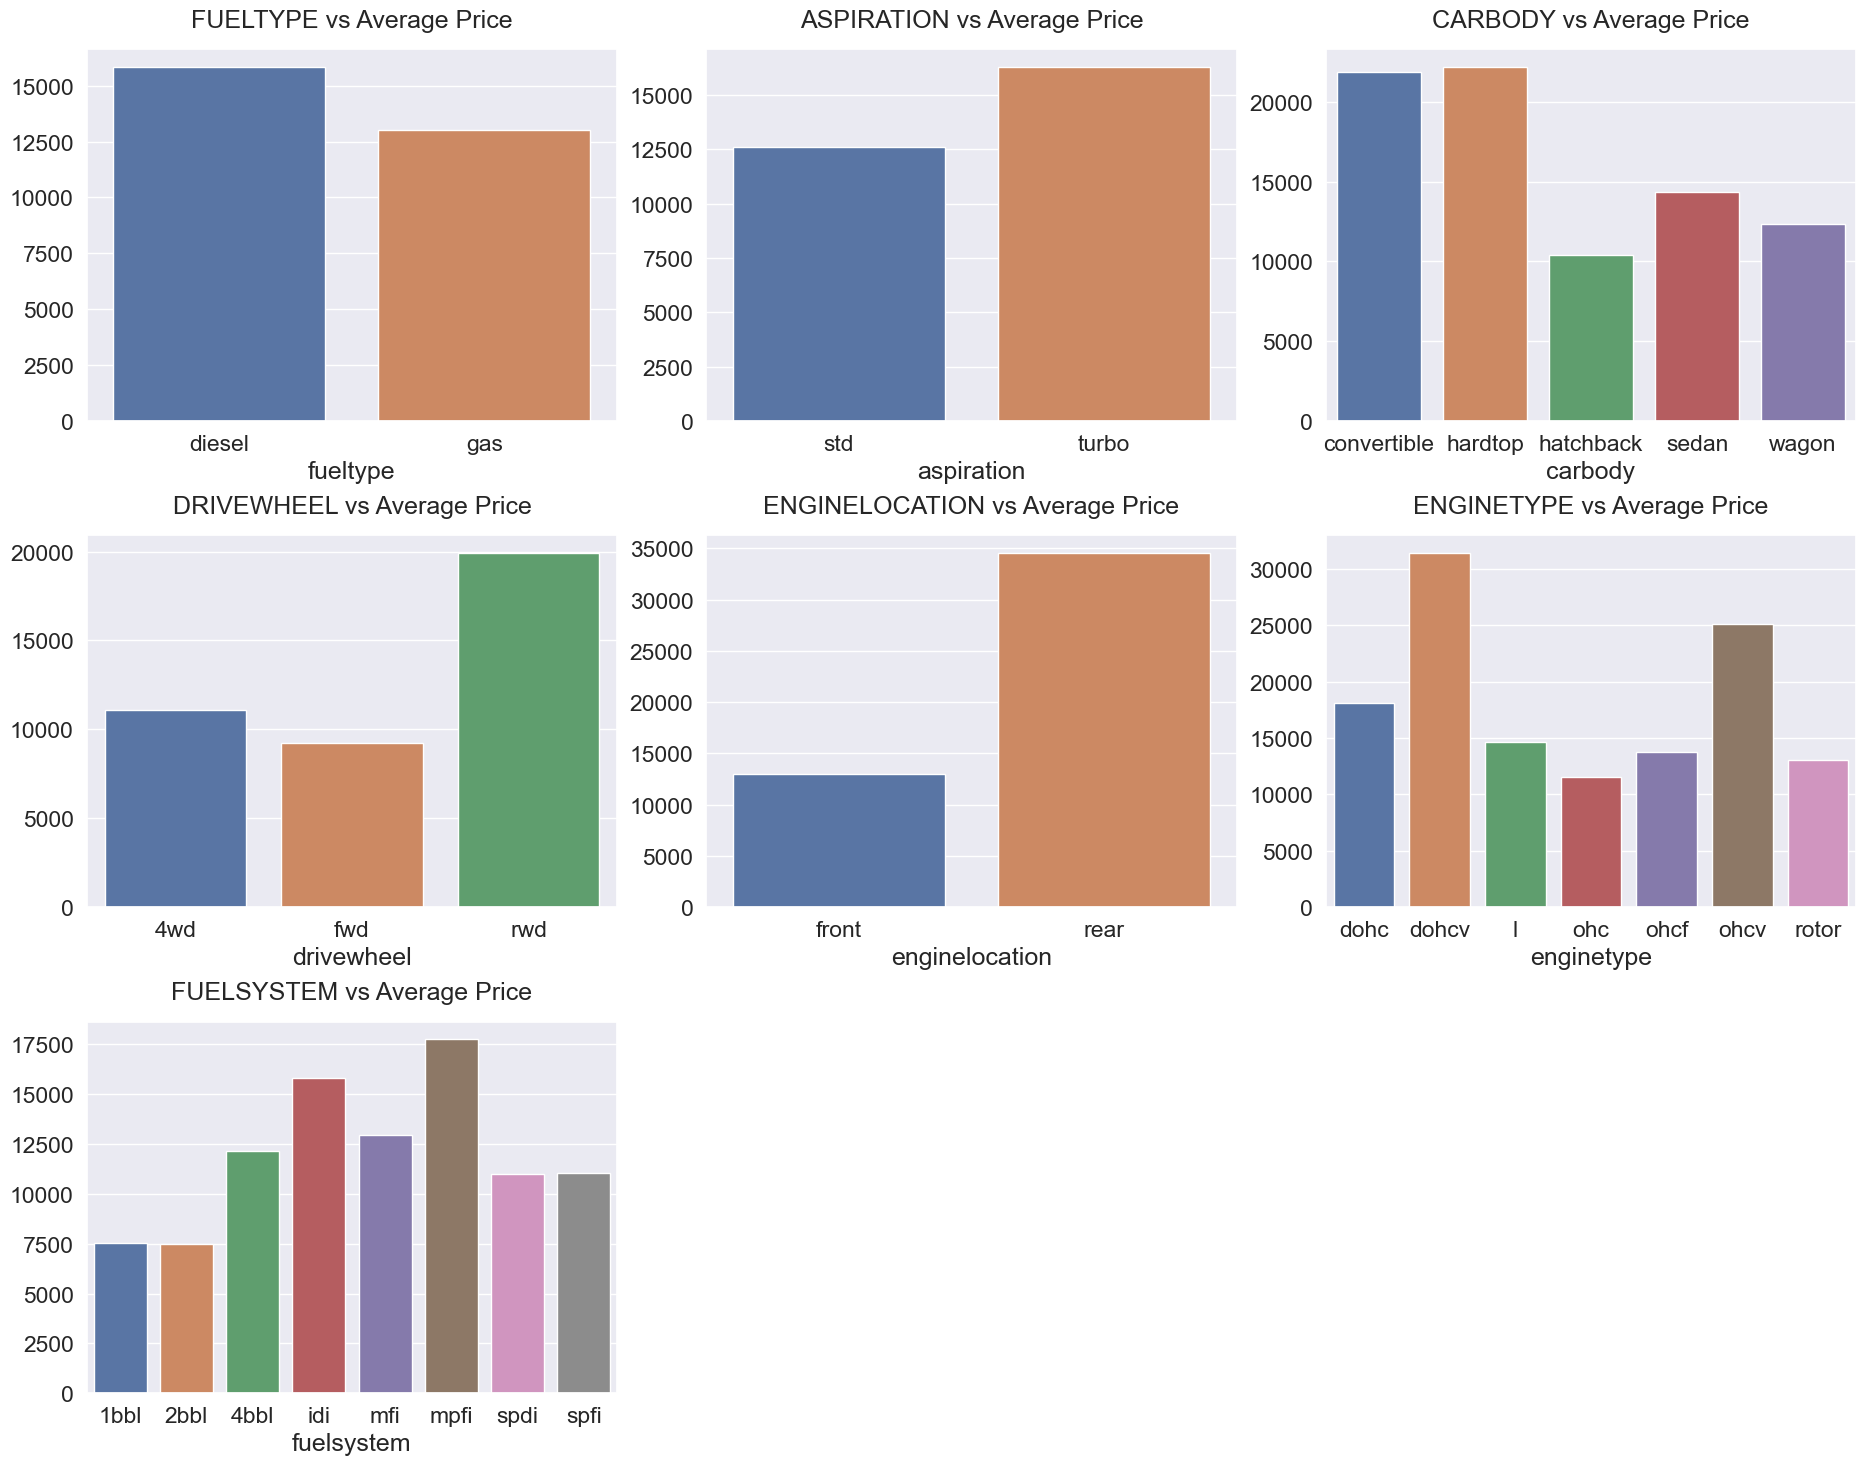

In [30]:
bar_plot(col_list=cat_cols)

Inferences:
1. Fuelsystem, Enginetype, Carbody have alot of cardinality. So we will perform Target Encoding.
2. The rets of the Features are valuable for predicting Price.

B. Discontinuous Features

In [30]:
#droppping the symboling feature
train_data.drop('symboling', axis=1, inplace=True)

In [31]:
dis_cols = ['doornumber', 'cylindernumber']

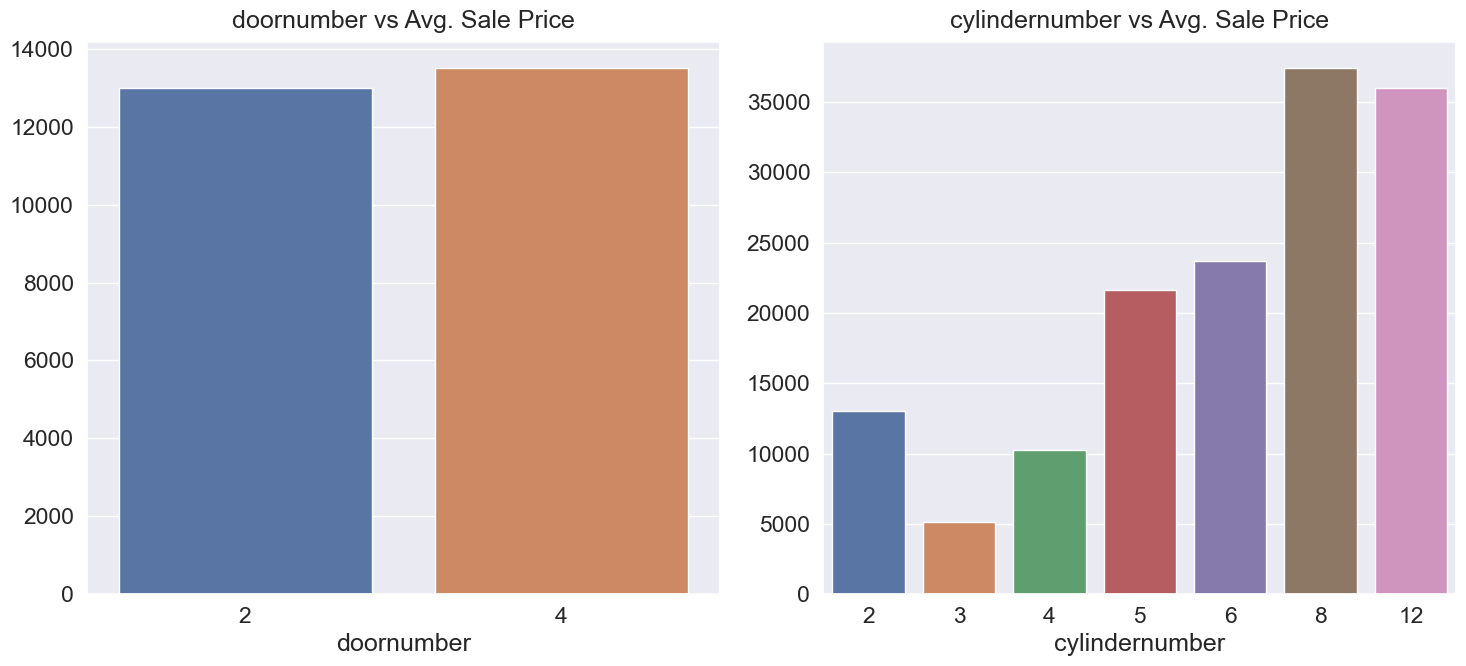

In [32]:
plt.figure(figsize=(15,7))
for idx,col in enumerate(dis_cols):
    data = train_data.groupby(col)["price"].mean()
    plt.subplot(1,2,idx+1)
    sns.barplot(x=data.index, y=data.values)
    plt.title(f"{col} vs Avg. Sale Price",pad=10)
    plt.tight_layout()

C. Scatterplot of All Numerical Features against Price

In [33]:
num_col = train_data.select_dtypes(exclude=['object']).columns

In [34]:
#creeating a scatterplot function
def scatter_plot(col_list):
    plt.figure(figsize=(22,12))

    for idx, col in enumerate(col_list):
        plt.subplot(2,4, idx +1)
        sns.scatterplot(x=col,y='price',data=train_data)
        plt.title(f'{col} Against SalePrice',pad=10)
        plt.tight_layout()
    plt.show()
      

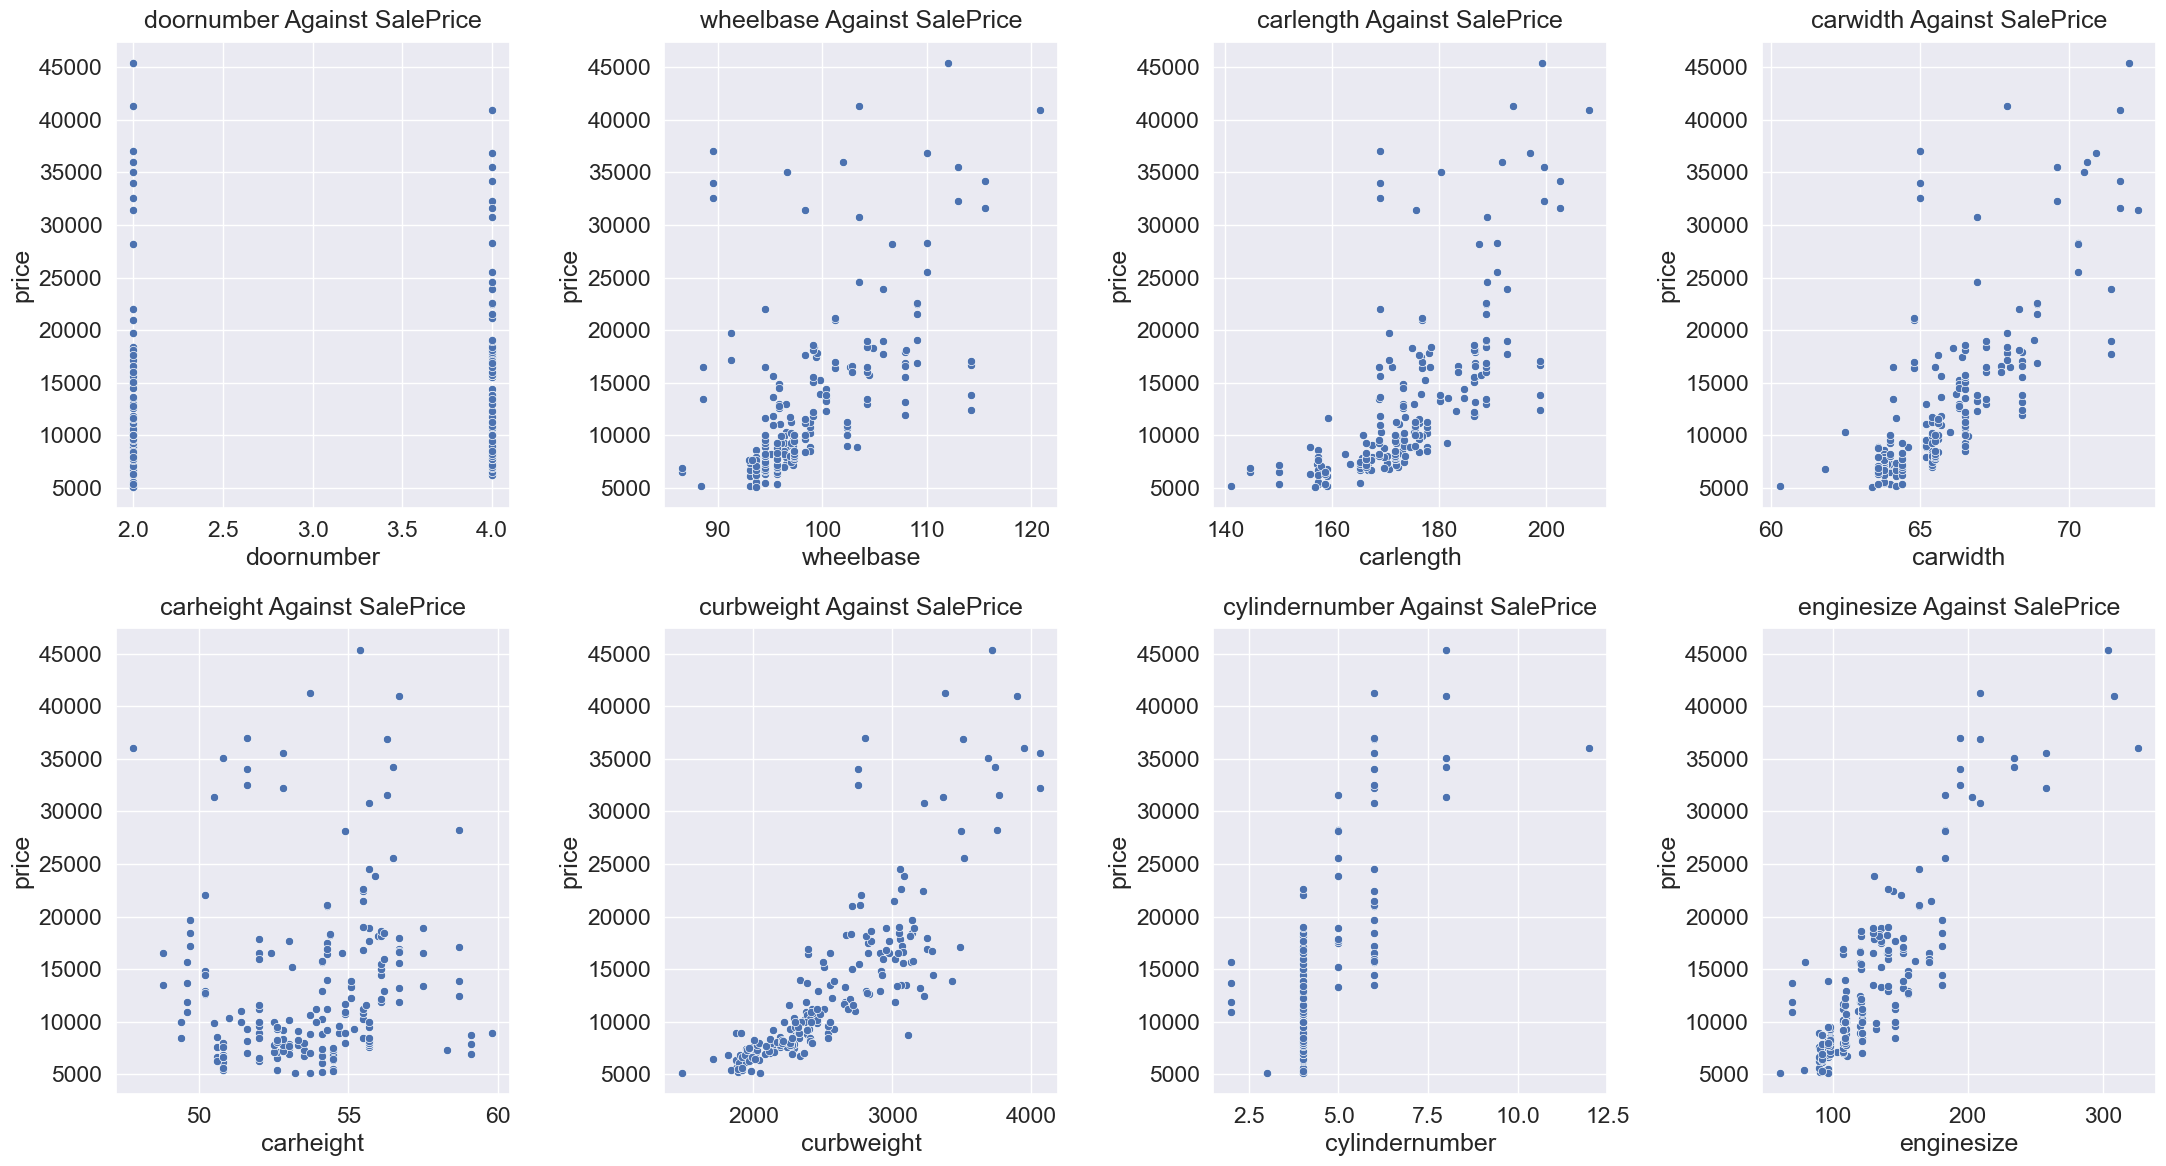

In [143]:
scatter_plot(num_col[0:8])

Inferences:
1. Features like Wheelbase, carLength, carWidth, Enginesize and Curbweight even Cylindernumber have a Positive retaion with the Target Price.
2. carHeight Feature has a modrate relationship with Price.
3. Doornumber Feature has no significant realtionship with the Target Price. So it will be dropped. 

In [35]:
#droppping the symboling feature
train_data.drop('doornumber', axis=1, inplace=True)

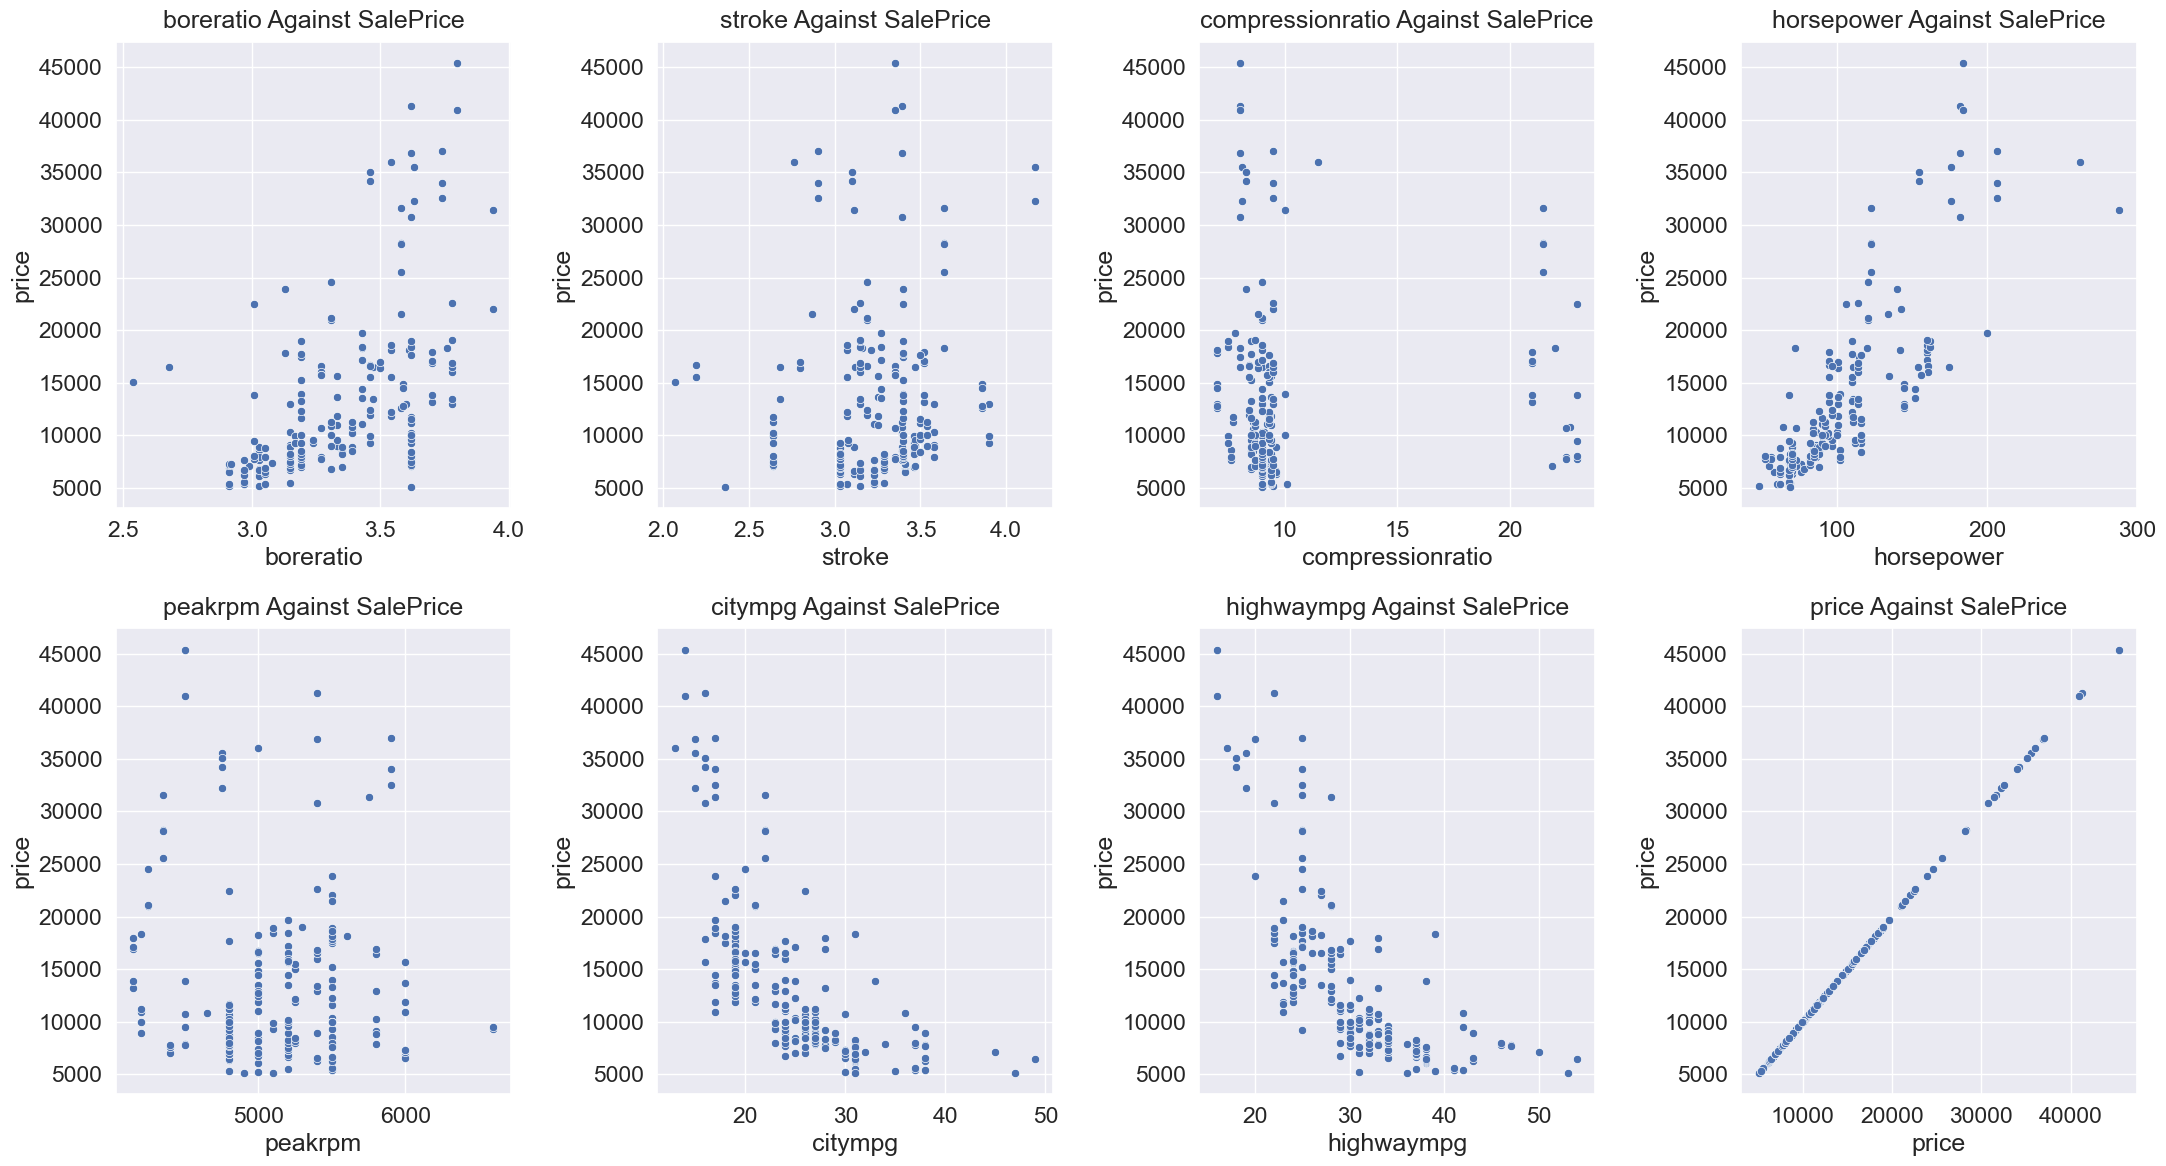

In [145]:
scatter_plot(num_col[8:])

Inferences:
1. Features like Stroke, Citympg and Highwaympg have a negative realtion with the traget Price.
2. Features like Boreratio and Compressionration have a postive relation with the traget Price.
3. Peakrpm Feature doesn't have any important relationship with Price. So it will be dropped.
4. The Target Feature has a postive relation with itself as expected.

In [36]:
#dropping the peakrpm feature
train_data.drop(columns=['peakrpm'], axis=1, inplace=True)

#### Correlation Matrix

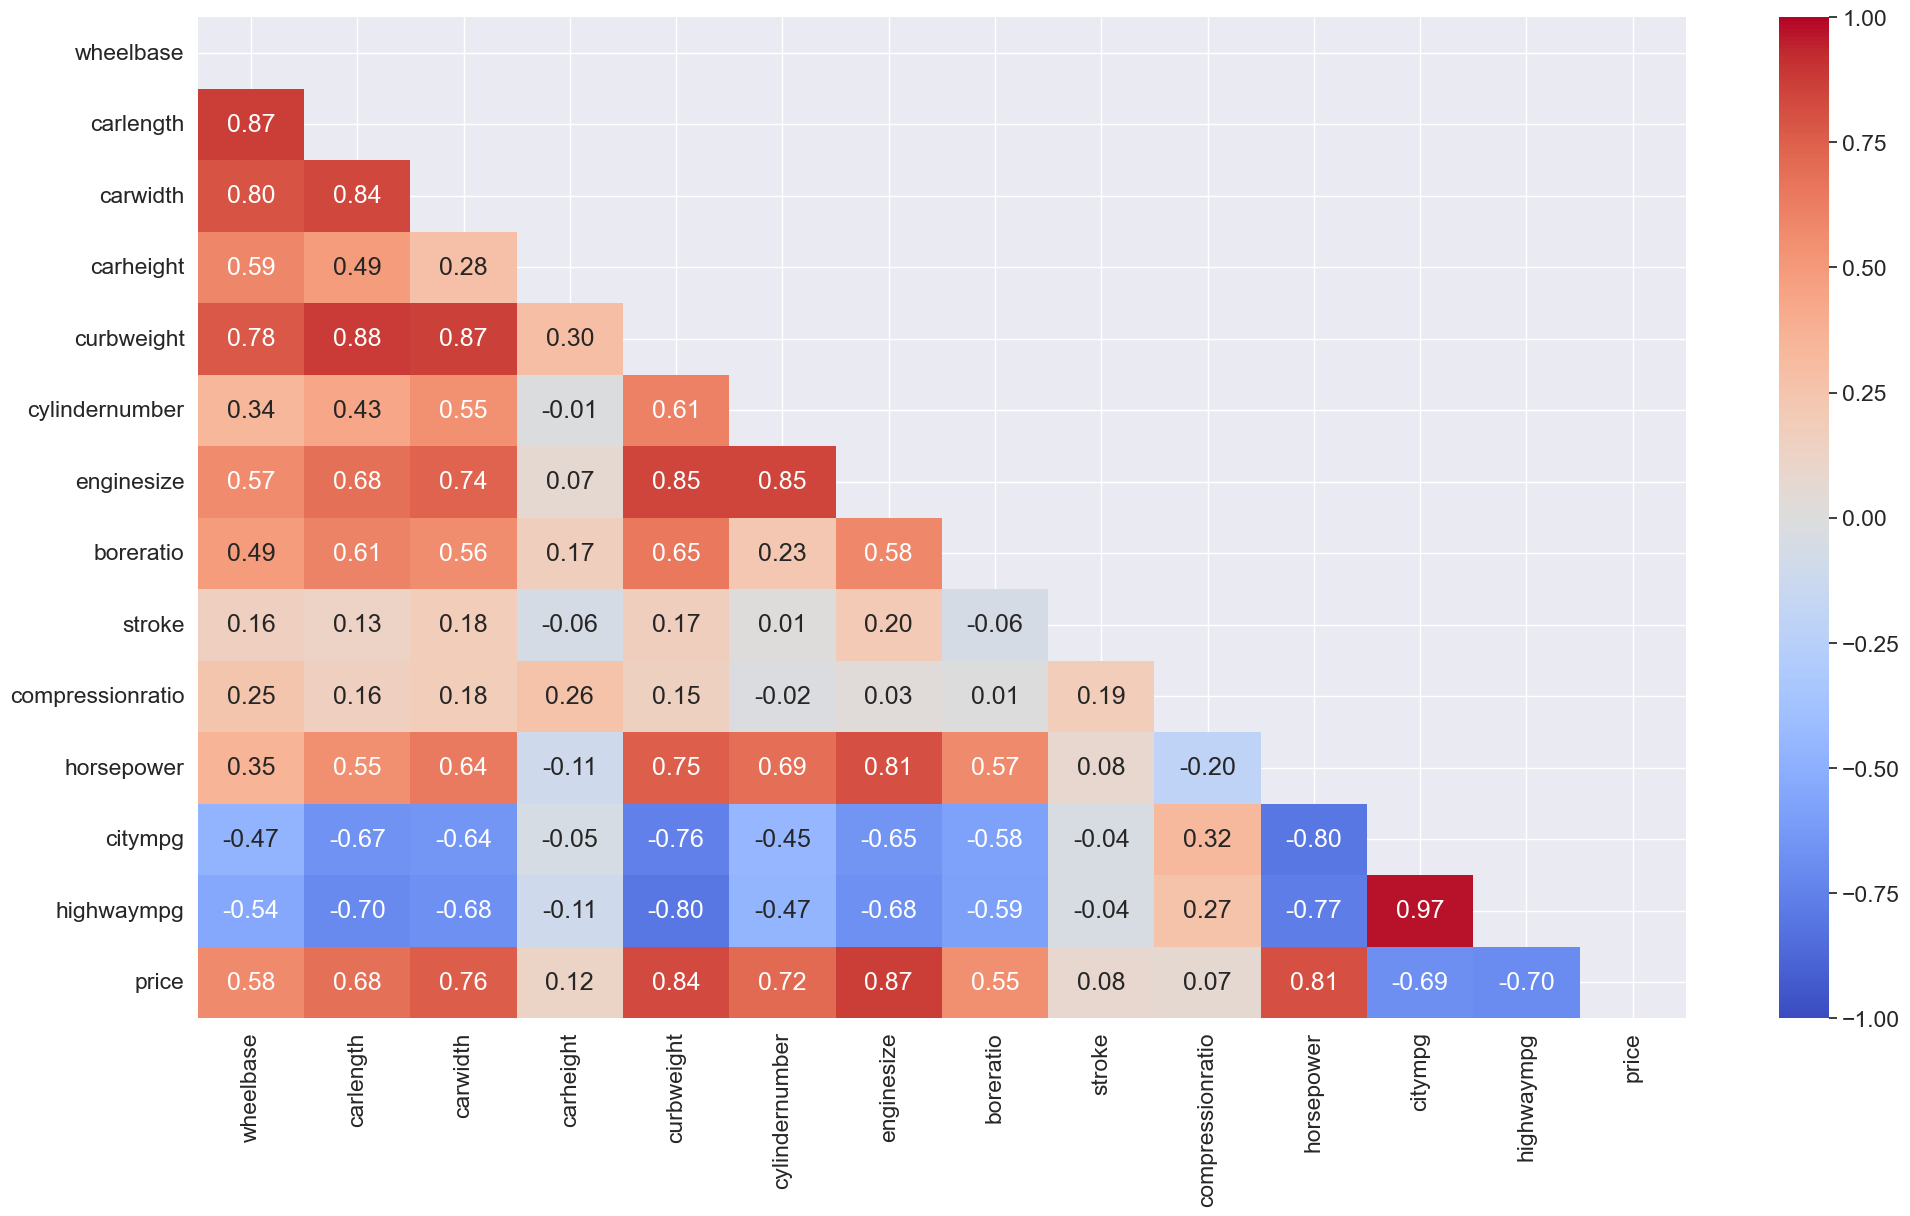

In [37]:
numerical_features= train_data.select_dtypes('number').columns


matrix = np.triu(train_data[numerical_features].corr())
plt.subplots(figsize=(24,13)) 
sns.heatmap (train_data[numerical_features].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix);

<a id="8"></a>
<font color="lightseagreen" size=+2.5><b>Feature Engineering</b></font>

In [38]:
tdf= train_data.copy()

1. Total Mpg

In [39]:
train_data['Total_mpg']= train_data['highwaympg'] + train_data['citympg']

In [40]:
#dropping the features
col = ['highwaympg', 'citympg']
train_data.drop(columns=col, axis=1, inplace=True)

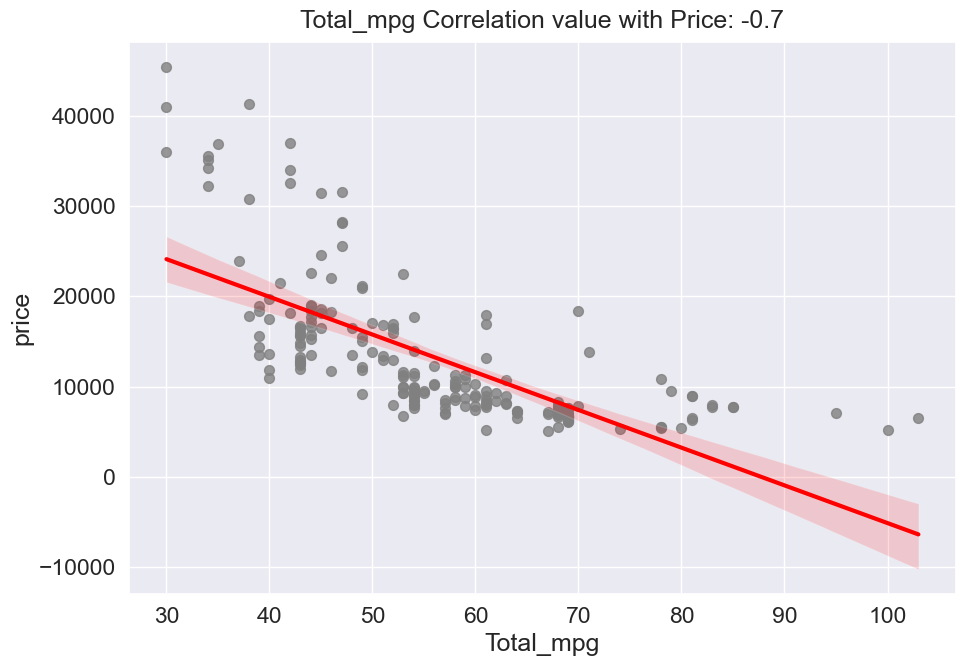

In [41]:
columns=  ['Total_mpg']


plt.figure(figsize=(10,7))

for idx, column in enumerate(columns):
    
    sns.regplot(
        x=train_data[column],
        y= train_data['price'],
        color='#808080',
        scatter_kws={
            's': 50, 'alpha': 0.8
        },
        line_kws={'color': 'red', 'lw': 3}
    )
    corr = round(train_data[[column, 'price']].corr()['price'][0], 2)

    plt.title(f"{column} Correlation value with Price: {corr}",pad=10)

    plt.tight_layout()


Inferences:
1. There is a negative correlation between Price and Total_mpg

2. Engine Volume

In [42]:
train_data['engine_volume'] = np.pi * (0.5 * train_data['boreratio'])**2 * train_data['stroke'] * train_data['cylindernumber']

In [43]:
#dropping the features
col = ['boreratio', 'stroke', 'cylindernumber']
train_data.drop(columns=col, axis=1, inplace=True)

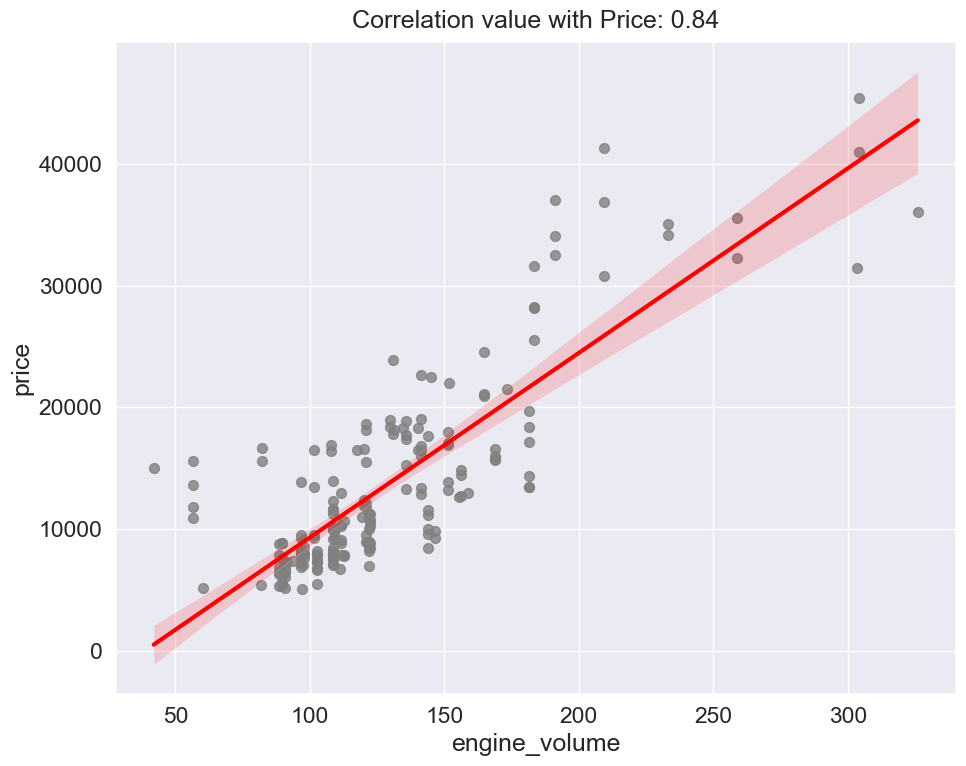

In [44]:
columns=  ['engine_volume']


plt.figure(figsize=(10,8))

for idx, column in enumerate(columns):

    sns.regplot(
        x=train_data[column],
        y= train_data['price'],
        color='#808080',
        scatter_kws={
            's': 50, 'alpha': 0.8
        },
        line_kws={'color': 'red', 'lw': 3}
    )
    corr = round(train_data[[column, 'price']].corr()['price'][0], 2)

    plt.title(f"Correlation value with Price: {corr}",pad=10)

    plt.tight_layout()


Inferences:
1. There is a positive correlation between Price and Engine Volume.

3. Vehicle Surface Area

In [45]:
# Car Area
train_data['Vehicle_Surface_Area'] = train_data['carlength'] * train_data['carwidth']


In [46]:
#dropping the featuresd
col = ['carlength', 'carwidth']
train_data.drop(columns=col, axis=1, inplace=True)

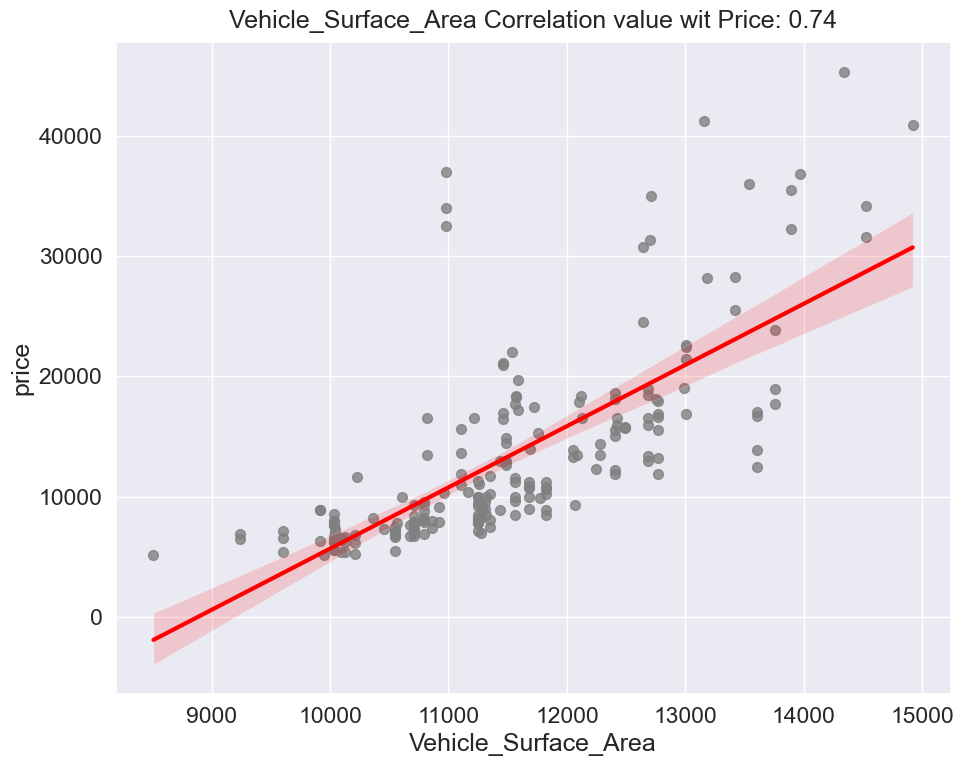

In [47]:
columns=  ['Vehicle_Surface_Area']


plt.figure(figsize=(10,8))

for idx, column in enumerate(columns):
    
    sns.regplot(
        x=train_data[column],
        y= train_data['price'],
        color='#808080',
        scatter_kws={
            's': 50, 'alpha': 0.8
        },
        line_kws={'color': 'red', 'lw': 3}
    )
    corr = round(train_data[[column, 'price']].corr()['price'][0], 2)

    plt.title(f"{column} Correlation value wit Price: {corr}",pad=10)

    plt.tight_layout()


Inferences:
1. There is a positive correlation between Price and Vehicle Surface Area

<a id="9"></a>
<font color="lightseagreen" size=+2.5><b>Data Preprocessing 2</b></font>

1. Outlier Detection

In [48]:
#selecting numerical features
num_features = train_data.select_dtypes(exclude=['object']).columns.tolist()

In [49]:
#box plot creation
def box_plot(col_list):
    plt.figure(figsize=(24,19))

    for idx, val in enumerate(col_list):
        plt.subplot(3,4,idx+1)

        sns.boxplot(
            x= train_data[val]
        )

        plt.title(f'{val.upper()} Boxplot Distribution')

        plt.tight_layout(w_pad=0.5, h_pad=0.5)
    plt.show()



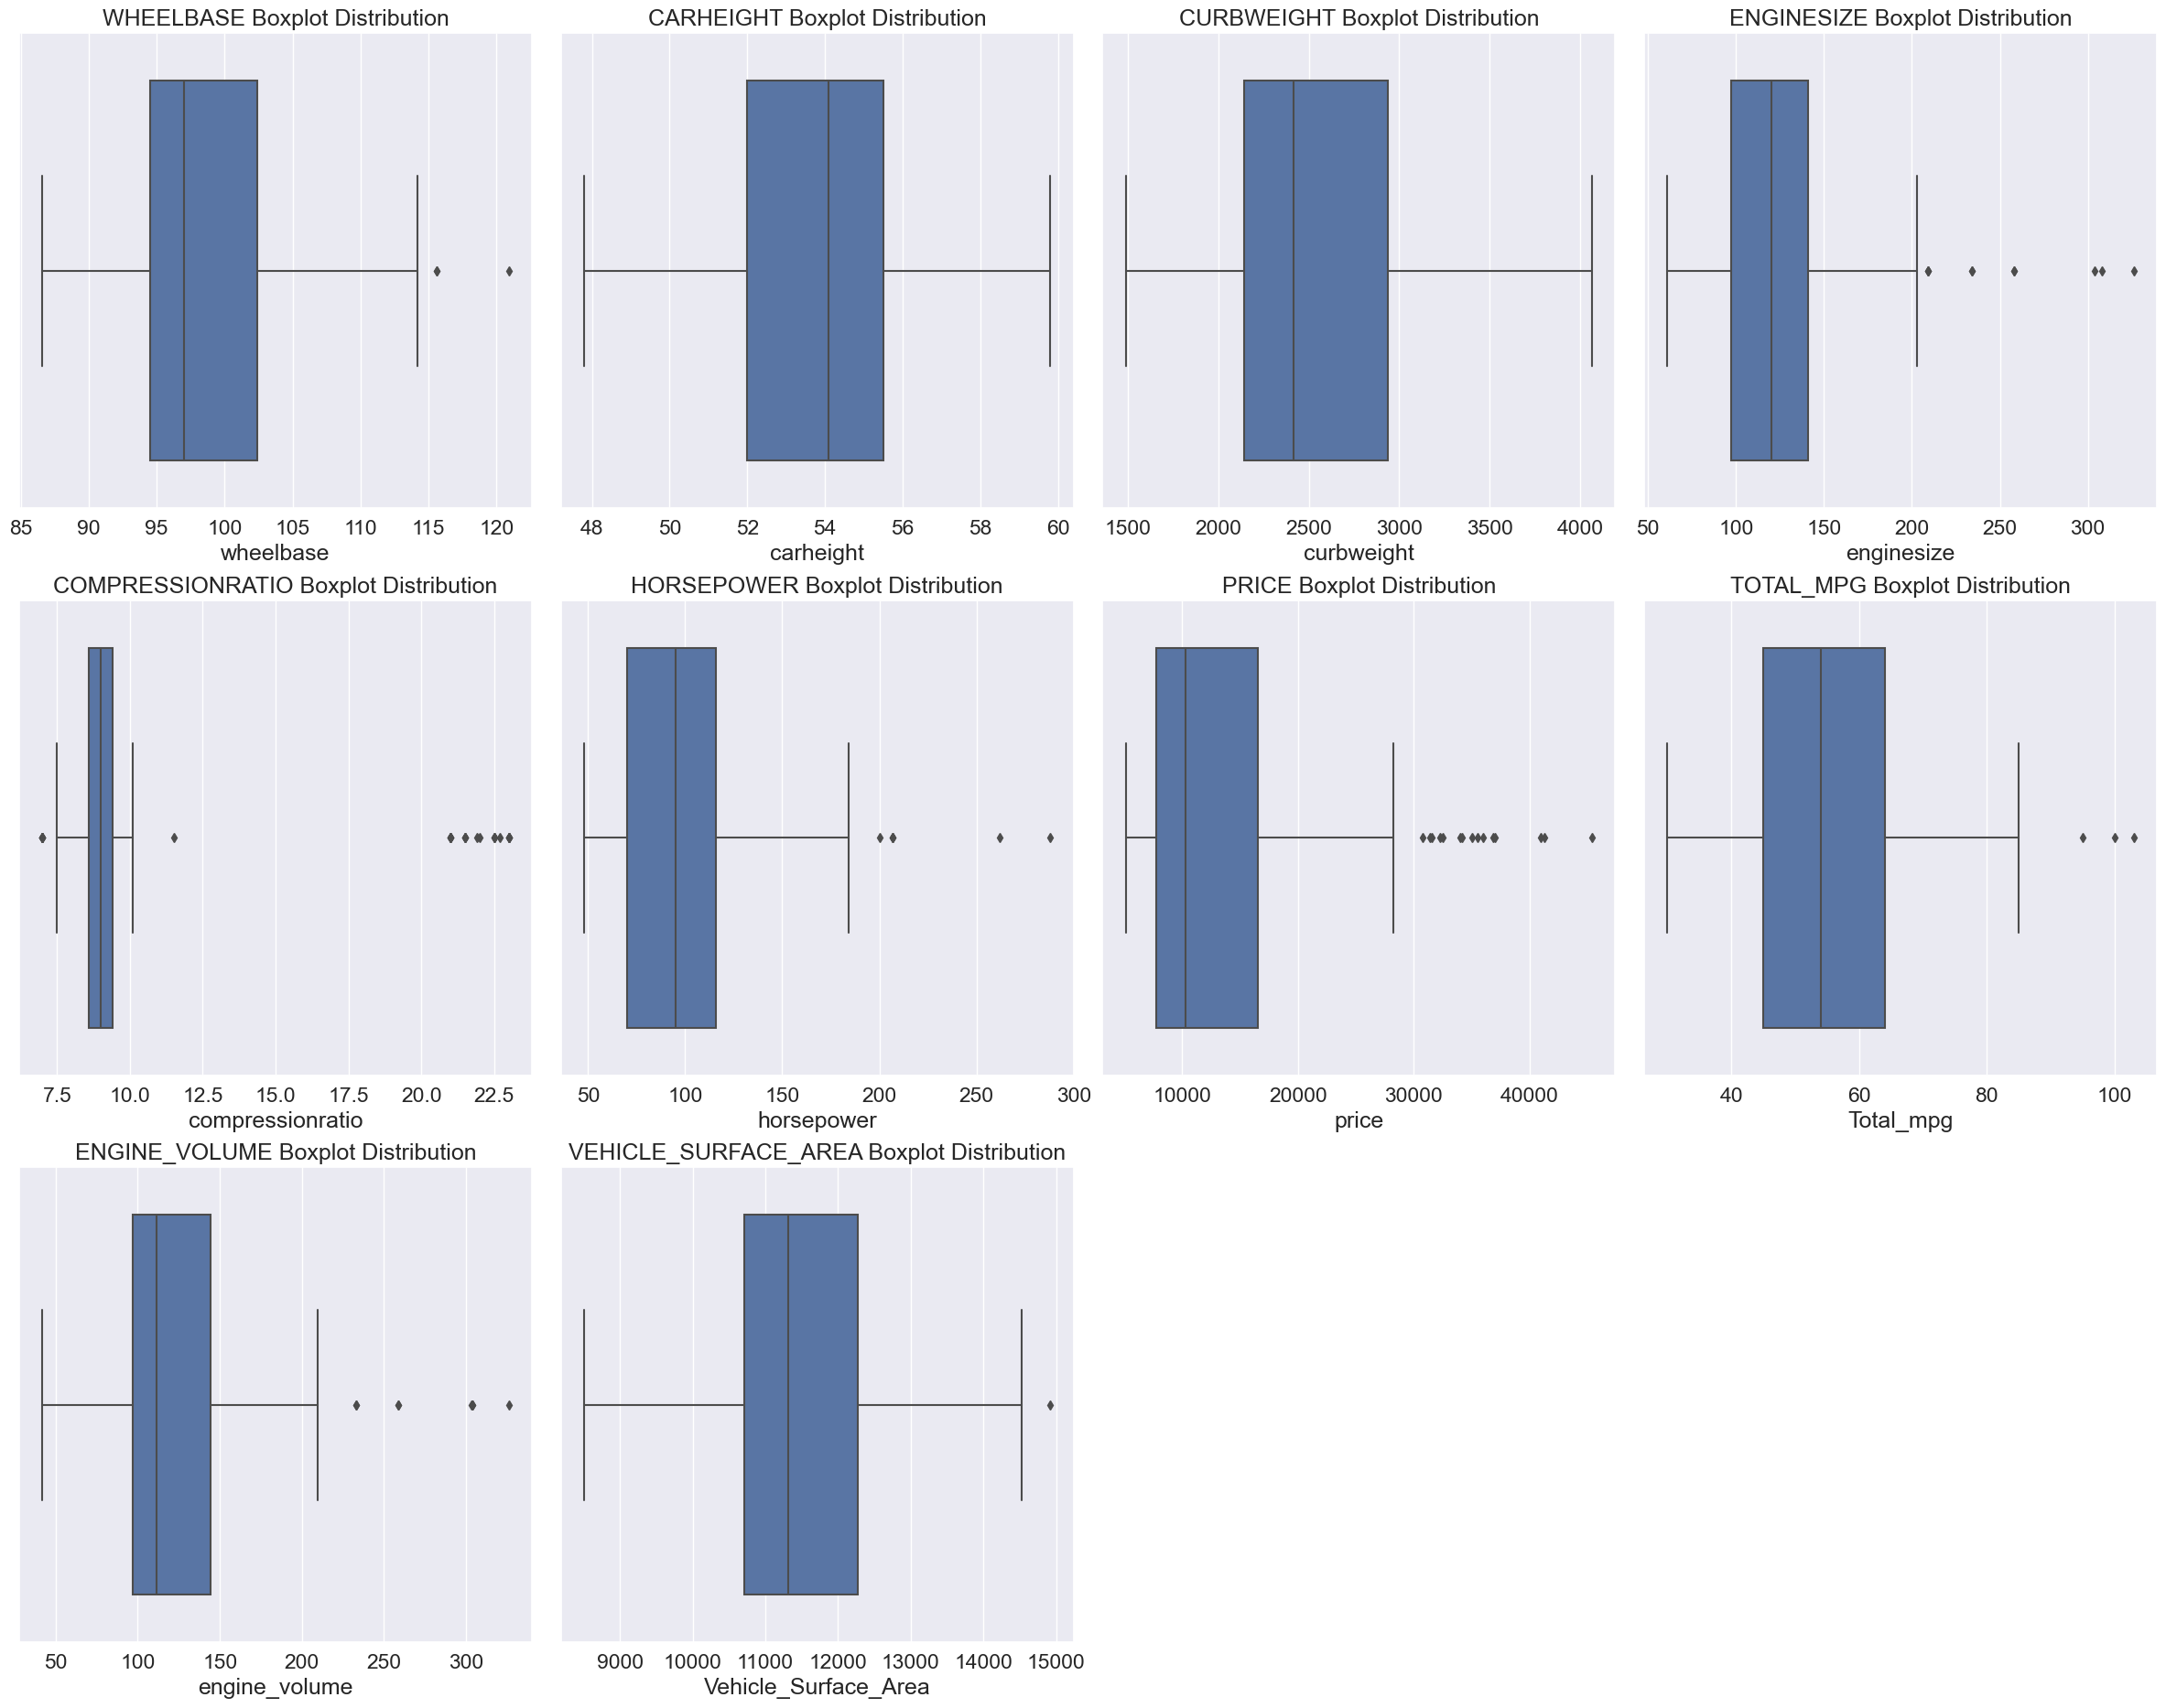

In [50]:
box_plot(col_list=num_features)

In [51]:
#getting the 99 percentile
for idx, col in enumerate(num_features):
    print(f'{col} --> {train_data[col].quantile(.90)}')

wheelbase --> 107.9
carheight --> 56.62
curbweight --> 3230.0
enginesize --> 181.0
compressionratio --> 10.939999999999992
horsepower --> 160.0
price --> 22563.0
Total_mpg --> 69.6
engine_volume --> 181.291367327122
Vehicle_Surface_Area --> 13008.320000000002


In [52]:
#capping outliers
for idx, col in enumerate(num_features):
    train_data[col]= np.where(train_data[col] > train_data[col].quantile(0.90), train_data[col].quantile(0.90), train_data[col])

2. Reducing Skewness

In [53]:
num_col_list= train_data.select_dtypes(exclude='object').columns.tolist()
num_col_list.remove('price')
columns= num_col_list

In [54]:
train_data[columns].skew().to_frame().rename(columns={0:'Skewness Values'})

,Skewness Values
wheelbase,0.489567
carheight,-0.359364
curbweight,0.173842
enginesize,0.602676
compressionratio,0.200578
horsepower,0.569607
Total_mpg,-0.164004
engine_volume,0.445103
Vehicle_Surface_Area,-0.014342


In [55]:
#dealing with high skewed features
high_skewed = []

for idx, col in enumerate(columns):
    if train_data[col].skew() > 0.5:
        high_skewed.append(col)
        

#applying natural log
for idx, col in enumerate(high_skewed):
    train_data[col]= np.log1p(train_data[col])

3. Target Feature Price

In [56]:
z = train_data["price"]

train_data["price"] = np.log1p(train_data["price"])

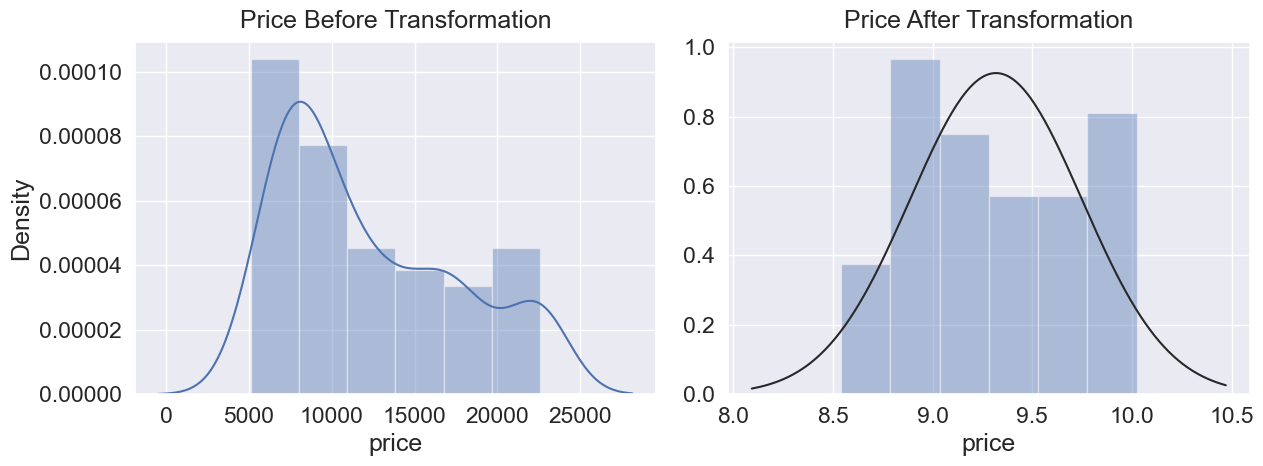

In [57]:
from scipy import stats
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.distplot(z,kde=True)
plt.title("Price Before Transformation",pad=10)

plt.subplot(1,2,2)
sns.distplot(
    train_data['price'], kde=False, fit=stats.norm
)

plt.title("Price After Transformation",pad=10)
plt.tight_layout()
plt.show()

Inferences:
1. The Price Feature now follows a normal distribution.

4. Pipeline Creation

In [58]:
# Define numerical columns and columns to target encode
num_cols = ['wheelbase', 'carheight', 'curbweight', 'enginesize', 'compressionratio',
            'horsepower', 'Total_mpg', 'engine_volume', 'Vehicle_Surface_Area']
target_columns = ['carbody', 'enginetype', 'fuelsystem']
onehot_cols = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation']

# Create preprocessing steps for numerical columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create preprocessing steps for target encoding
target_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder(cols=target_columns))
])

# Create preprocessing steps for one-hot encoding
onehot_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Create column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('target', target_transformer, target_columns),
        ('onehot', onehot_transformer, onehot_cols)
    ])

5. Data Splitting

In [59]:
final_df = train_data.copy()

In [60]:
X= final_df.drop('price', axis=1)
y= final_df['price']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [62]:
print("Dimension of X_train:=>",X_train.shape)
print("Dimension of X_test:=>",X_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of X_train:=> (164, 16)
Dimension of X_test:=> (41, 16)
Dimension of y_train:=> (164,)
Dimension of y_test:=> (41,)


<a id="11"></a>
<font color="lightseagreen" size=+2.5><b>Model Evaluation</b></font>

In [160]:
def plot_scatter_residuals(model, y_train, predictions_train, y_test, predictions_test):
    """
    Plot scatter plot and residual plot for model predictions.
    
    Parameters:
        model: str
            Name of the model.
        y_train: array-like
            True target values for the training set.
        predictions_train: array-like
            Predicted target values for the training set.
        y_test: array-like
            True target values for the testing set.
        predictions_test: array-like
            Predicted target values for the testing set.
    """
    # Scatter plot and residual plot
    plt.figure(figsize=(25, 15))

    # Scatter plot
    plt.subplot(1, 2, 1)    
    plt.scatter(y_train, predictions_train, color='blue', label='Train')
    plt.scatter(y_test, predictions_test, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title(f'Scatter Plot of {model}', pad=10)

    # Residual plot
    plt.subplot(1, 2, 2)
    plt.scatter(predictions_train, predictions_train - y_train, color='blue', label='Train')
    plt.scatter(predictions_test, predictions_test - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel(f'Residuals of {model}')
    plt.legend()
    plt.title('Residual Plot', pad=10)

    plt.show()

In [64]:
# Define the models
models = [LinearRegression(), Ridge(), SVR(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()]

In [65]:
# Lists to store final results
final_r2 = []
final_mae = []
final_mse = []
final_rmse = []

In [66]:
# Loop through each model
for model in models:
    # Combine preprocessing steps into a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline (
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions_train = pipeline.predict(X_train)
    predictions_test = pipeline.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, predictions_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)

    # Store the results
    final_r2.append(r2)
    final_mae.append(mae)
    final_mse.append(mse)
    final_rmse.append(rmse)

    # Print model information and performance metrics
    print('Model:', model)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print('R-squared Score:', r2)
    print('Root Mean Squared Error:', rmse)
    print('--'*20)

Model: LinearRegression()
Mean Squared Error: 0.02495725448194485
Mean Absolute Error: 0.12136273463858602
R-squared Score: 0.8596361704562332
Root Mean Squared Error: 0.1579786519816676
----------------------------------------
Model: Ridge()
Mean Squared Error: 0.02142136131294763
Mean Absolute Error: 0.11472009230317387
R-squared Score: 0.8795226329842788
Root Mean Squared Error: 0.14636038163706608
----------------------------------------
Model: SVR()
Mean Squared Error: 0.019207753198019747
Mean Absolute Error: 0.10951385576189573
R-squared Score: 0.8919723402365416
Root Mean Squared Error: 0.13859203872524478
----------------------------------------
Model: DecisionTreeRegressor()
Mean Squared Error: 0.019087321025694926
Mean Absolute Error: 0.0988865203185042
R-squared Score: 0.8926496711873485
Root Mean Squared Error: 0.1381568710766675
----------------------------------------
Model: RandomForestRegressor()
Mean Squared Error: 0.012112555143785798
Mean Absolute Error: 0.087790555

Storing the Results

In [67]:
models = ['LinearRegression', 'Ridge Regression', 'SVR', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'KNeighbors']

In [68]:
new_df =pd.DataFrame({
    'Models': models,
    'R2_Score':final_r2,
    'MSE':final_mse,
    'MAE':final_mae,
    'RMSE': final_rmse
    
})
new_df

,Models,R2_Score,MSE,MAE,RMSE
0,LinearRegression,0.859636,0.024957,0.121363,0.157979
1,Ridge Regression,0.879523,0.021421,0.114720,0.146360
2,SVR,0.891972,0.019208,0.109514,0.138592
3,DecisionTree,0.892650,0.019087,0.098887,0.138157
4,RandomForest,0.931877,0.012113,0.087791,0.110057
5,GradientBoosting,0.932047,0.012082,0.089508,0.109919
6,KNeighbors,0.874960,0.022233,0.116422,0.149106


In [69]:
import plotly.express as px


fig = px.bar(new_df.melt(id_vars='Models'), 
             x='Models', 
             y='value', 
             color='variable', 
             barmode='group', 
             title='Performance Metrics by Model',
             labels={'value': 'Value', 'variable': 'Metric', 'Models': 'Models'},
             width=1200, 
             height=800)


fig.update_xaxes(tickangle=45)

# Add annotations
for trace in fig.data:
    for i, val in enumerate(trace.y):
        fig.add_annotation(
            x=trace.x[i],
            y=val,
            text=f'{val:.4f}',  
            showarrow=False,
            font=dict(color='black', size=10),
            xshift=6  # Adjust the position of the text
        )

fig.show()
plt.show()

Inferences:
1. Both the Random Forest and Gradient Boosting Algorithms performed exceptionally well in terms of R-Square, Mean Squared Error ,Mean Absolute Error, Root Mean Squared Error.
2. The Decison Tree, SVR, Lasso and KNN Algorithms also performed well on the data.
3. The Linear Regression Algorithm performed worst compared to the 6 Algorithm.

### Hyparameter Tuning

In [70]:
from hyperopt import hp, tpe, fmin, Trials
from sklearn.model_selection import cross_val_score

In [141]:
hyper_mse = []
hyper_r2 =[]
hyper_mae=[]
hyper_rmse =[]

1. Radom Forest 

In [139]:
# Define a search space
rf_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(10, 200, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 11, dtype=int)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'random_state': 42
}

# Define the objective
def rf_objective(params):
    model = RandomForestRegressor(**params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

# Optimization algorithm
algo_opt = tpe.suggest

# Trails
rf_trials = Trials()

# Hyperparameter tuning
rf_best = fmin(
    fn=rf_objective, space=rf_space, algo=algo_opt, max_evals=50, trials=rf_trials, verbose=True
)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest Regressor:")
print(rf_best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [01:00<00:00,  1.20s/trial, best loss: 0.02364435260701883] 
Best hyperparameters for Random Forest Regressor:
{'max_depth': 6, 'max_features': 0, 'min_samples_leaf': 2, 'min_samples_split': 0.10603357331506956, 'n_estimators': 98}


In [146]:
#getting the best hypeparametrs
best_params_rf = {
    key: value for key , value in rf_best.items() if key != 'max_features'
}

#creating the model
model_rf = RandomForestRegressor(**best_params_rf)

#initianting the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_rf)])
#model training
pipeline.fit(X_train, y_train)

#making predictions
y_pred_rf = pipeline.predict(X_test)

y_pred_rft= pipeline.predict(X_train)

r2= r2_score(y_pred_rf, y_test)
mse= mean_squared_error(y_pred_rf , y_test)
mae = mean_absolute_error(y_pred_rf , y_test)
rmse = np.sqrt(mse)

hyper_r2.append(r2)
hyper_mse.append(mse)
hyper_mae.append(mae)
hyper_rmse.append(rmse)


print('RandomForestRegressor', '-'*100)
print('R2 Score', r2)
print('MSE', mse)
print('MAE', mae)
print('RMSE', rmse)

RandomForestRegressor ----------------------------------------------------------------------------------------------------
R2 Score 0.8849678779201879
MSE 0.019033875250138468
MAE 0.11224574909245702
RMSE 0.13796331124664438


2. Gradient Boosting

In [110]:
# Defining a search space
# Define search space for Gradient Boosting
gb_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(10, 200, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)),
    'min_samples_split': hp.randint('min_samples_split', 2, 20),
    'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 11, dtype=int)),
}

def gb_objective(params):
    model = GradientBoostingRegressor(**params)
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

# Optimization algorithm
algo_opt = tpe.suggest

# Trails
gb_trials = Trials()

# Hyperparameter tuning
gb_best = fmin(
    fn=gb_objective, space=gb_space, algo=algo_opt, max_evals=50, trials=gb_trials, verbose=True
)

# Print the best hyperparameters for Gradient Boosting
print("Best hyperparameters for Gradient Boosting Regressor:")
print(gb_best)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: 0.020038570810039895]
Best hyperparameters for Gradient Boosting Regressor:
{'learning_rate': 0.10534120690688735, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 143}


In [147]:
best_params_gb= {
    key: value for key , value in gb_best.items()
}

#creating the model
model_gb = GradientBoostingRegressor(**best_params_gb)

#initianting the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_gb)])
#model training
pipeline.fit(X_train, y_train)

#making predictions
y_pred_gb = pipeline.predict(X_test)

y_pred_gbt= pipeline.predict(X_train)


r2= r2_score(y_pred_gb, y_test)
mse= mean_squared_error(y_pred_gb , y_test)
mae = mean_absolute_error(y_pred_gb , y_test)
rmse = np.sqrt(mse)


hyper_r2.append(r2)
hyper_mse.append(mse)
hyper_mae.append(mae)
hyper_rmse.append(rmse)

print('Gradient Boosting Regressor', '-'*100)
print('R2 Score', r2)
print('MSE', mse)
print('MAE', mae)
print('RMSE', rmse)


Gradient Boosting Regressor ----------------------------------------------------------------------------------------------------
R2 Score 0.9315192709554201
MSE 0.013565215234265907
MAE 0.09673074717510392
RMSE 0.11646980395907734


#### Storing Final Results

In [149]:
models = ['RandomForest', 'GradientBoosting']
final_df =pd.DataFrame({
    'Models': models,
    'R2_Score':hyper_r2,
    'MSE':hyper_mse,
    'MAE':hyper_mae,
    'RMSE': hyper_rmse
    
})
final_df

,Models,R2_Score,MSE,MAE,RMSE
0,RandomForest,0.884968,0.019034,0.112246,0.137963
1,GradientBoosting,0.931519,0.013565,0.096731,0.116470


Conclusion
1. For the above figure we can see that the Gradient Boosting model performed exceptionally well compared to the Random Forest based on hyperparameter tuning.

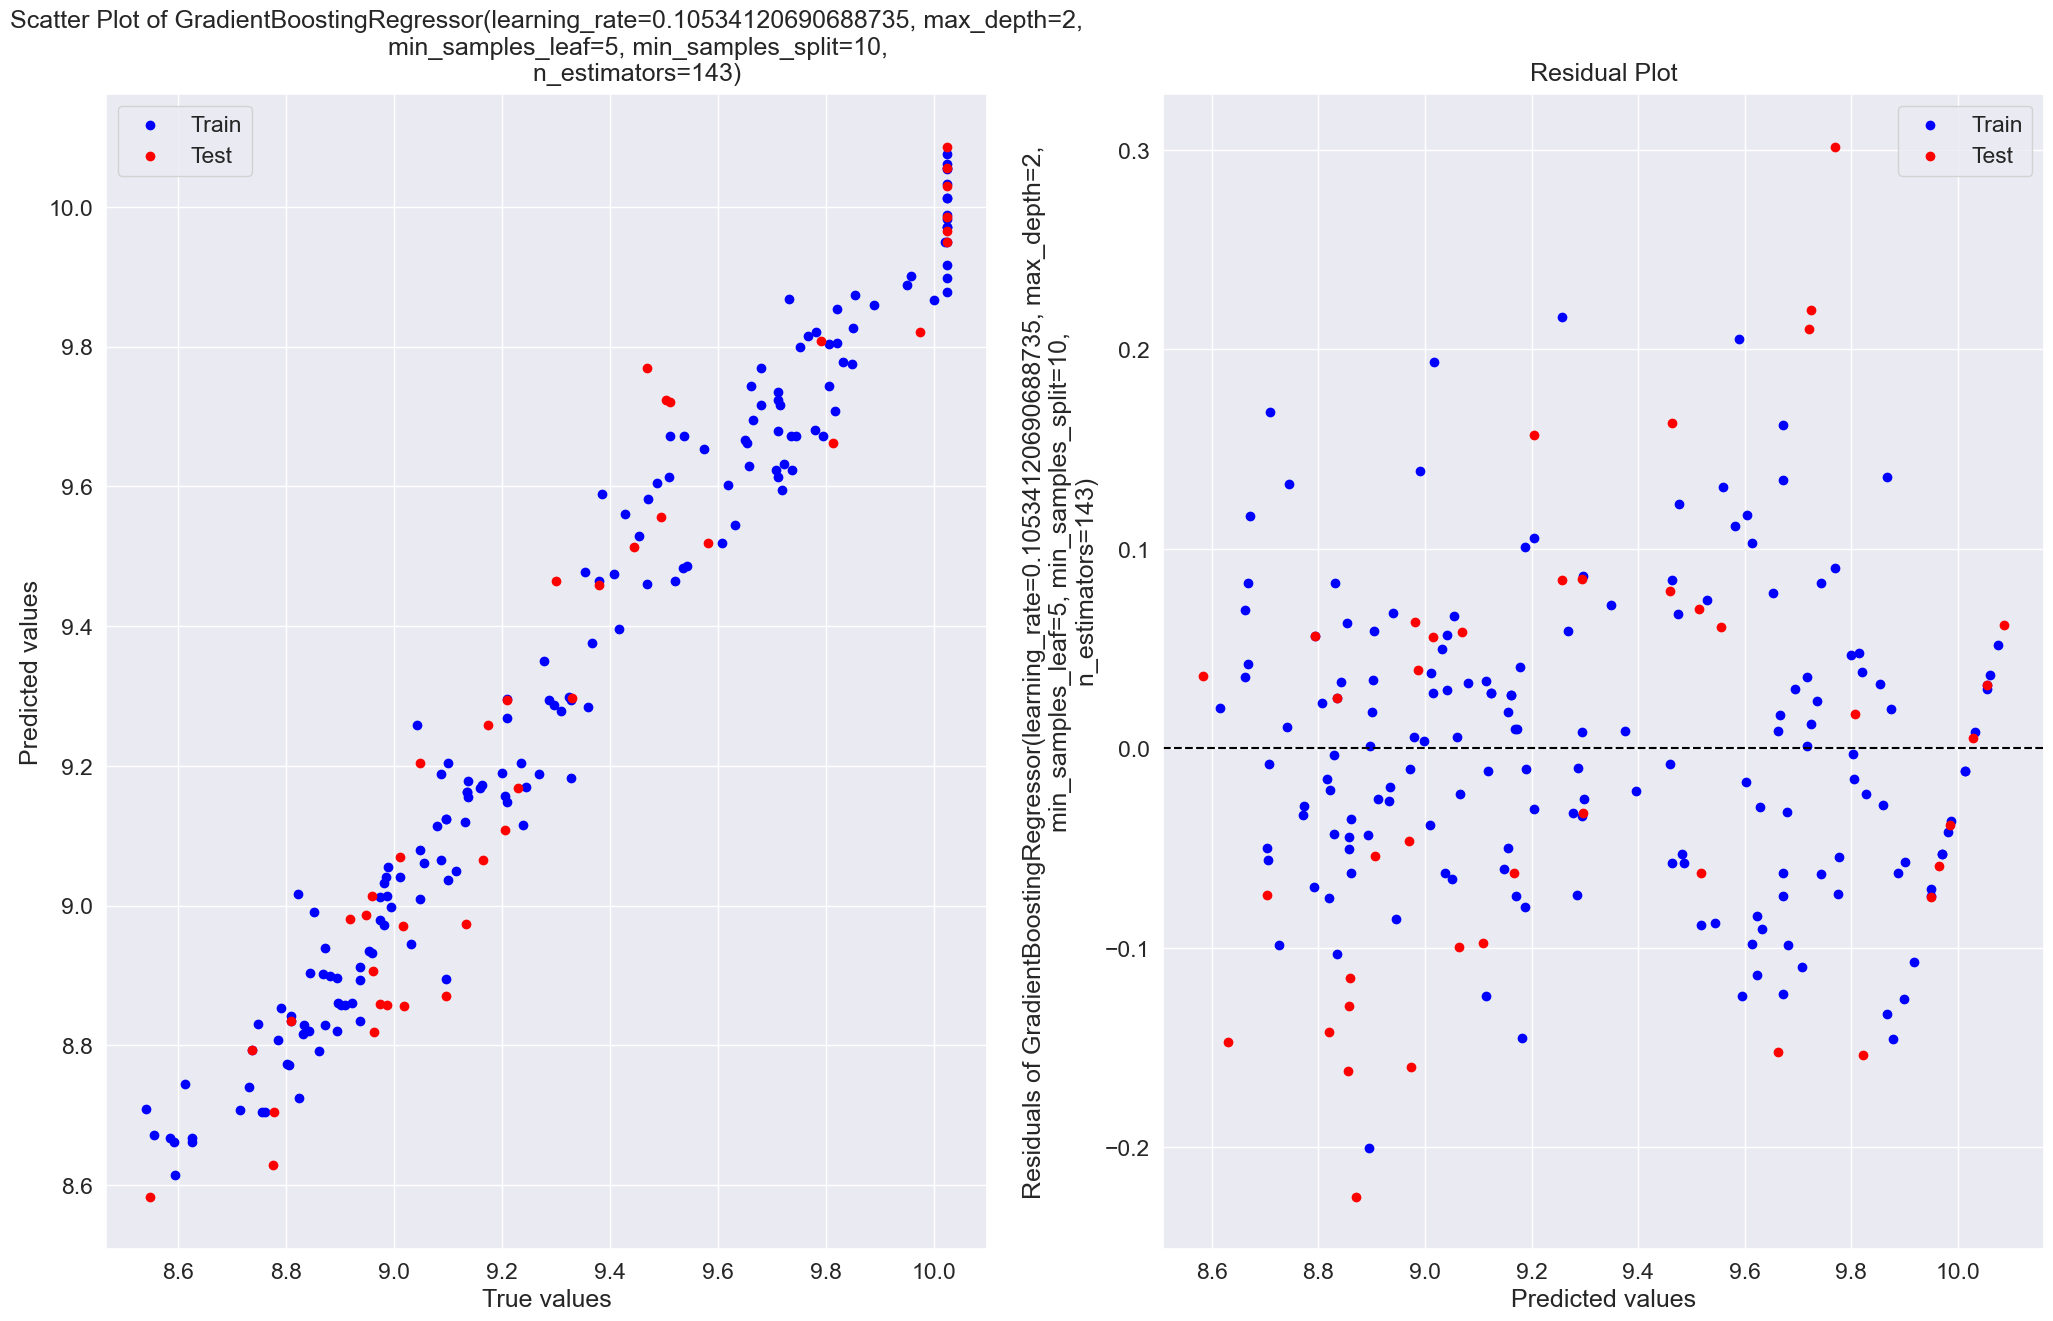

In [161]:
plot_scatter_residuals(model=model_gb, y_train=y_train, predictions_train=y_pred_gbt, y_test=y_test, predictions_test= y_pred_gb)

Inferences:
1. Fig 1. we can see the Gradient Boosting Model Predicted Values and the Actual Values
2. Fig 2. we can see the Residuals plot let from the models predictions.

In [158]:
import pickle

# Save the model to a file
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(model_gb, f)